In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,SVR
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
traindf = pd.read_csv("train.csv")
traindf

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
testdf = pd.read_csv("test.csv")
testdf

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


C:\Users\esco1\AppData\Local\Temp\ipykernel_19220\2679926769.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d=traindf.corr()


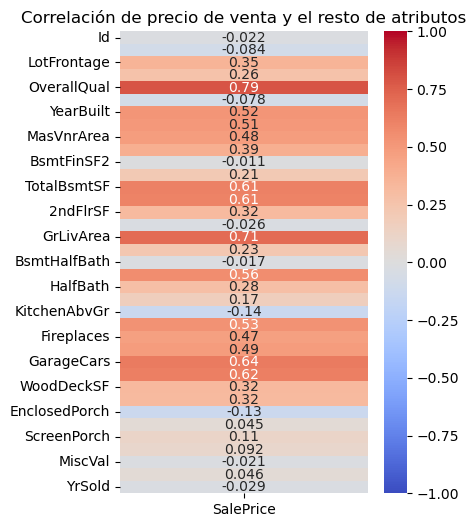

In [4]:
import seaborn as sns
# plt.figure(figsize=(30,30))
d=traindf.corr()
specific_corr = d[['SalePrice']].drop(index='SalePrice')  # Drop if you don't want to include self-correlation

# Create a heatmap
plt.figure(figsize=(4, 6))  # Adjust the figure size as needed
sns.heatmap(specific_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlación de precio de venta y el resto de atributos')
plt.show()

C:\Users\esco1\AppData\Local\Temp\ipykernel_19220\1911428583.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,8))


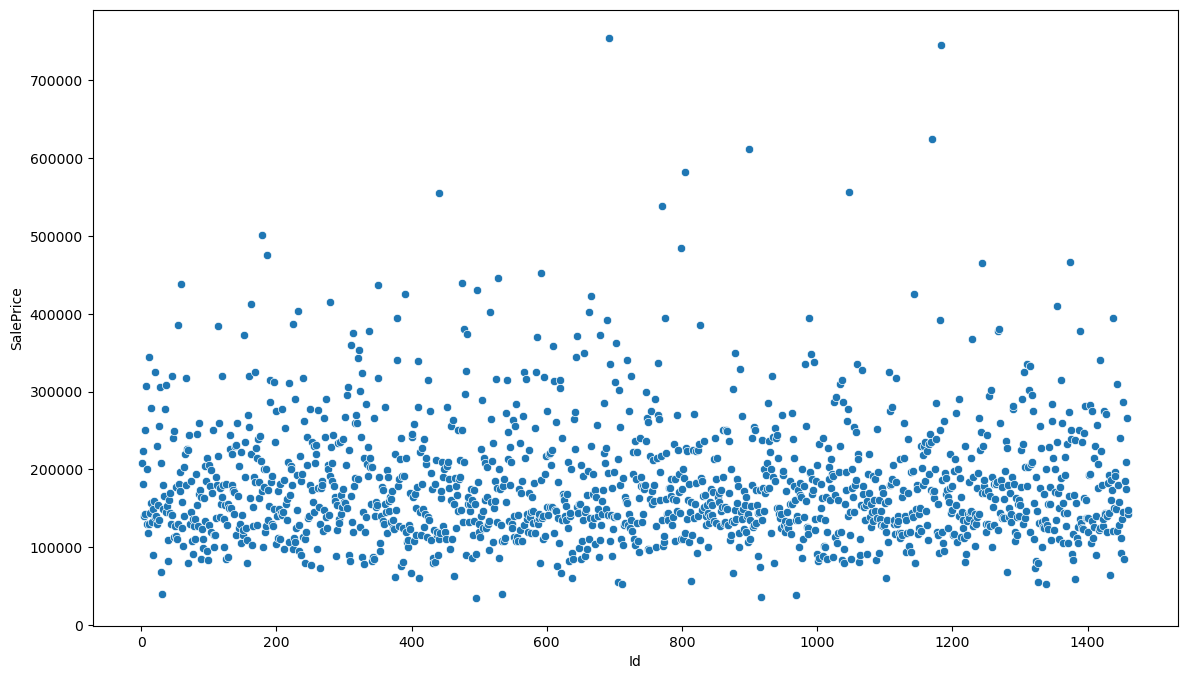

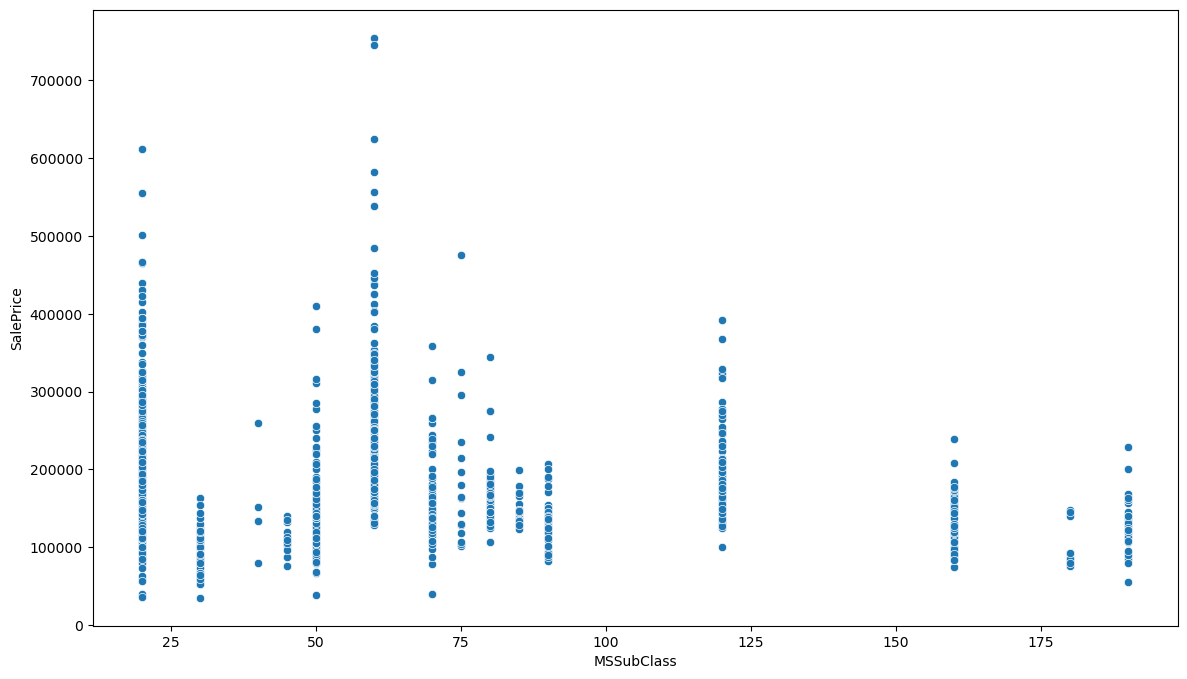

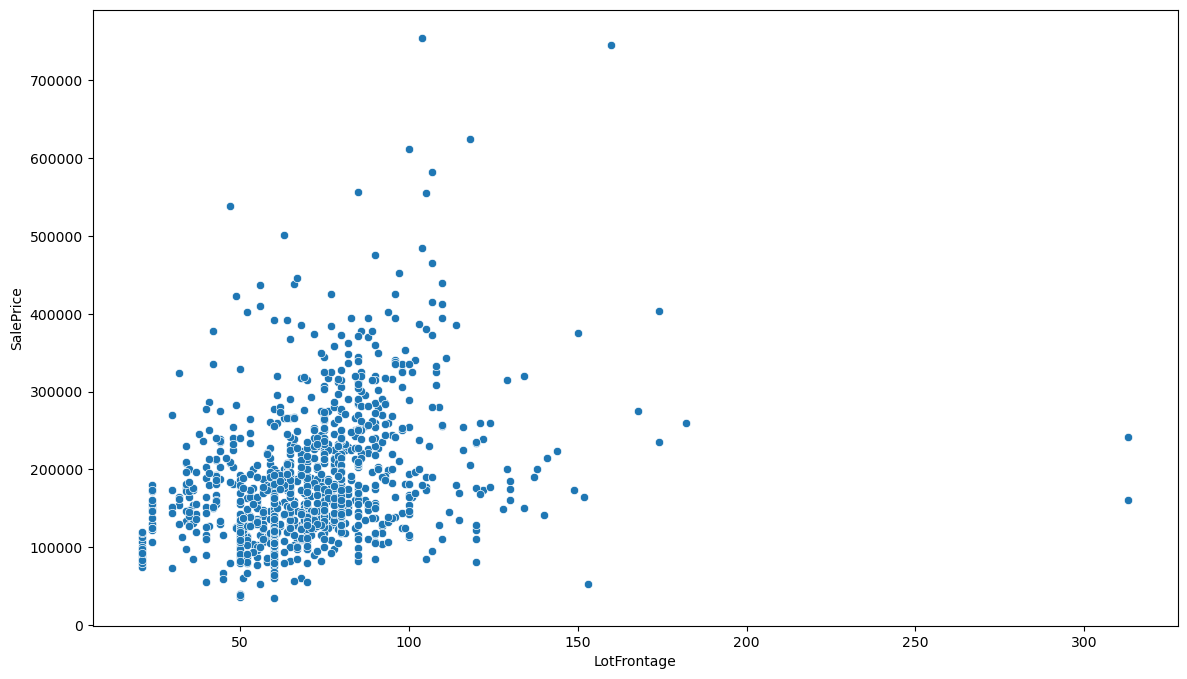

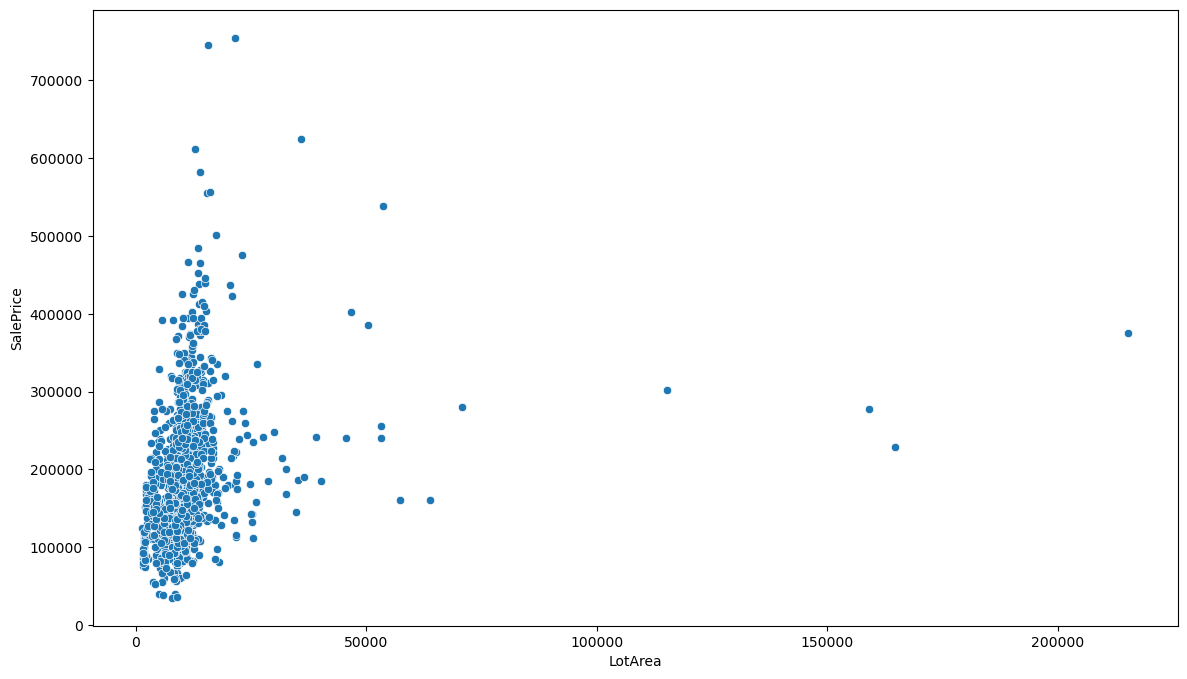

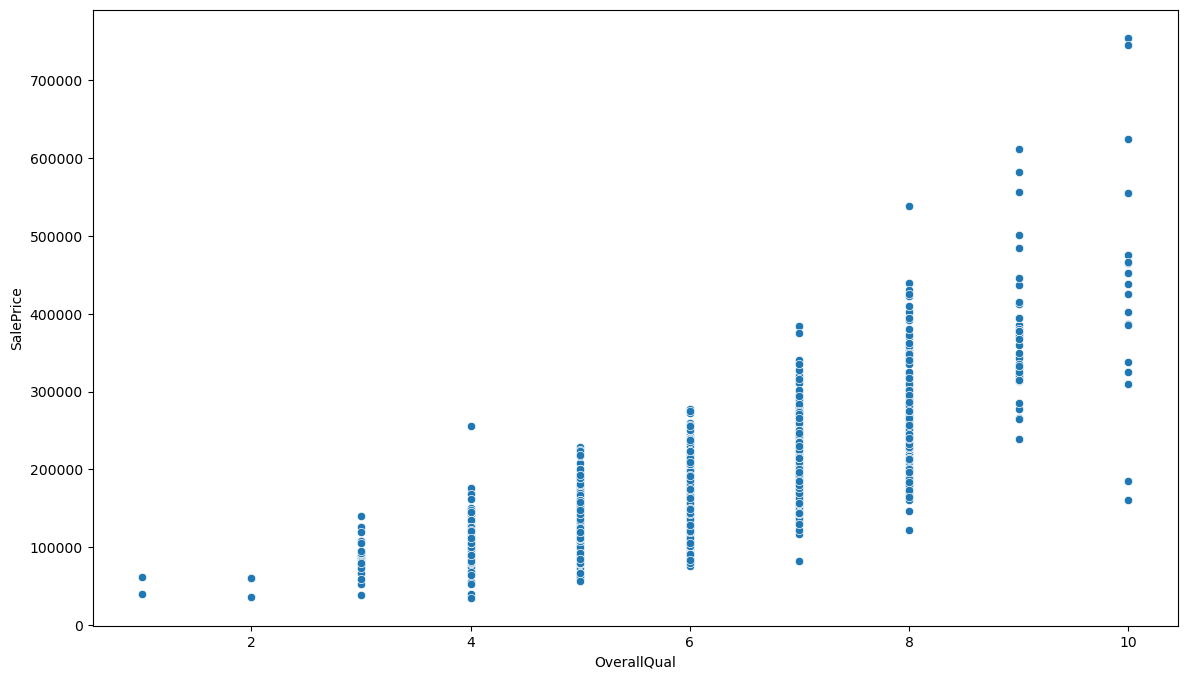

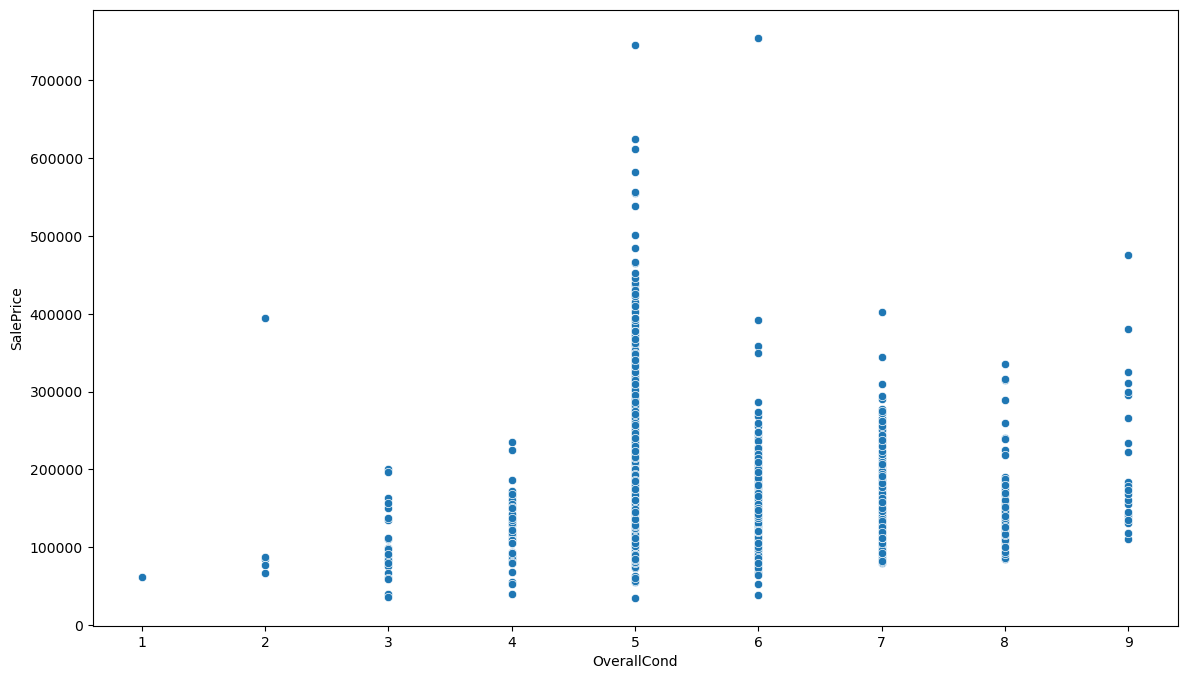

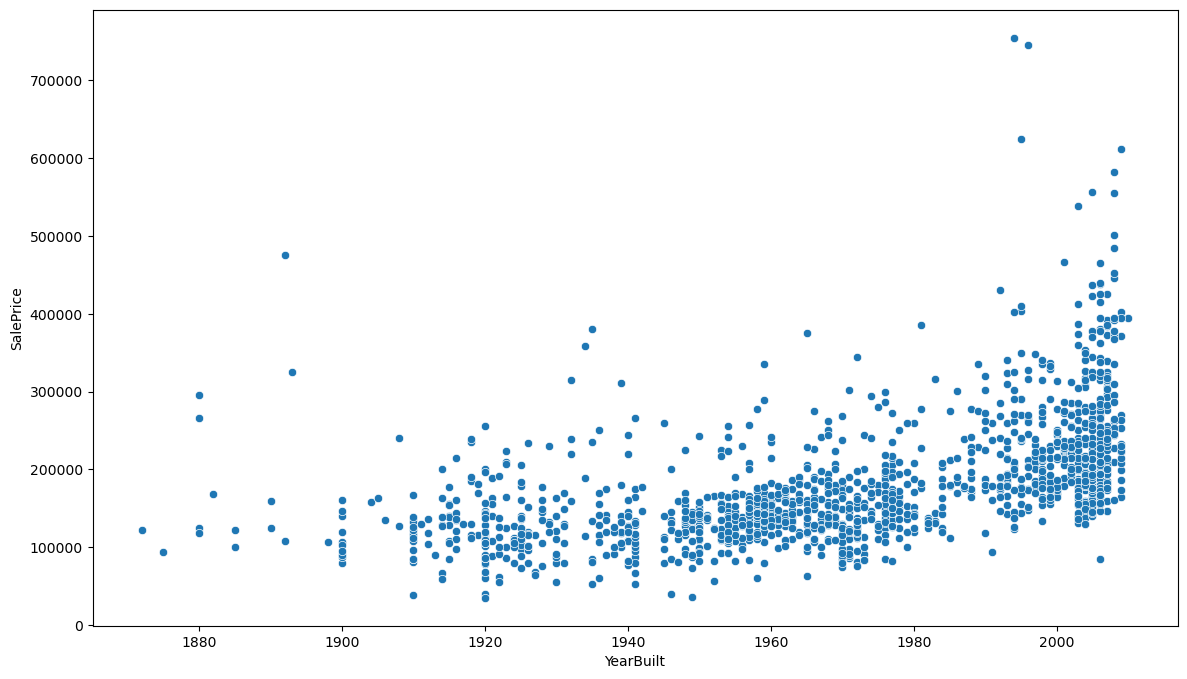

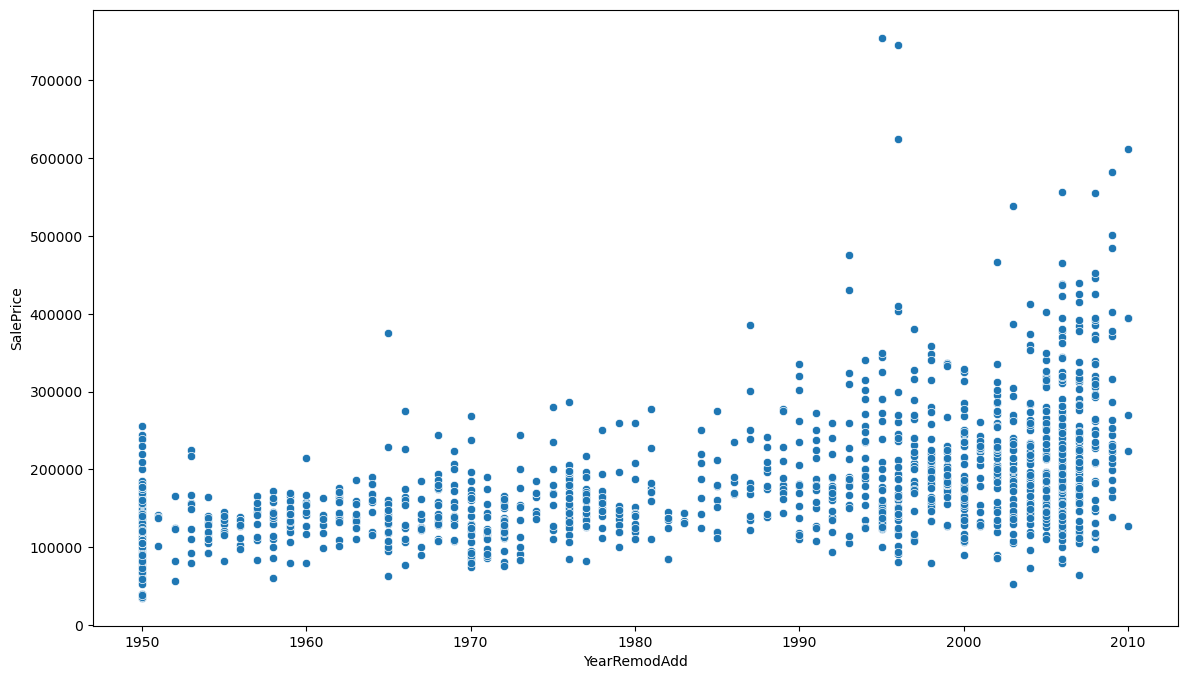

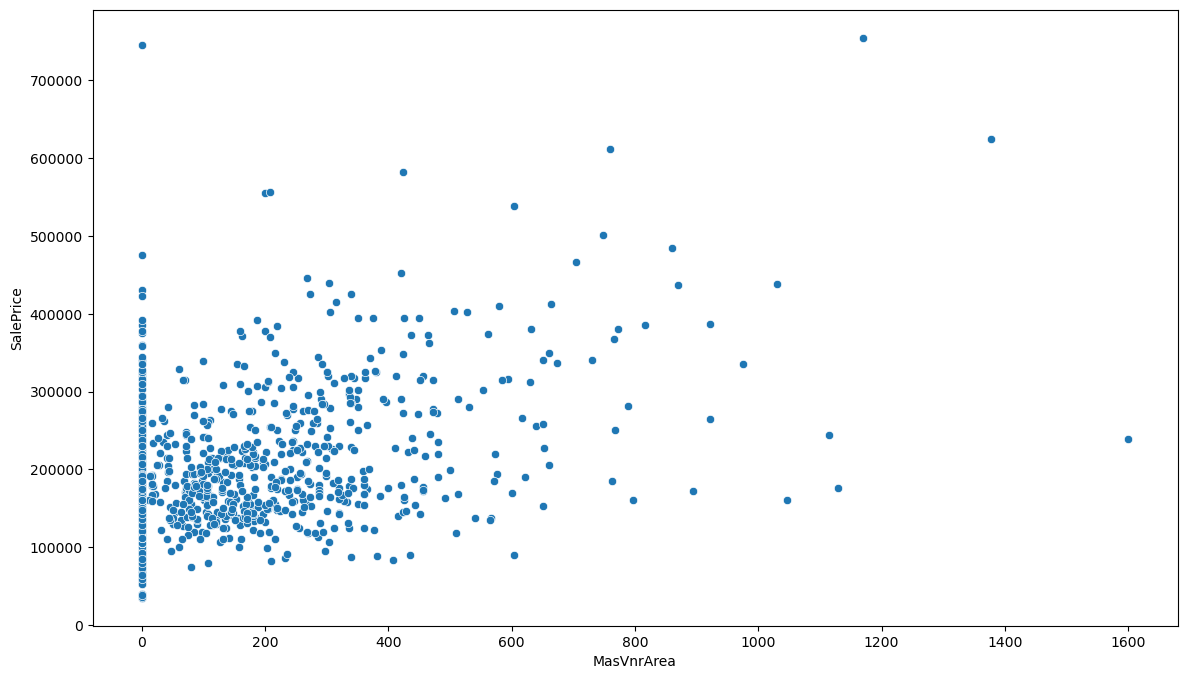

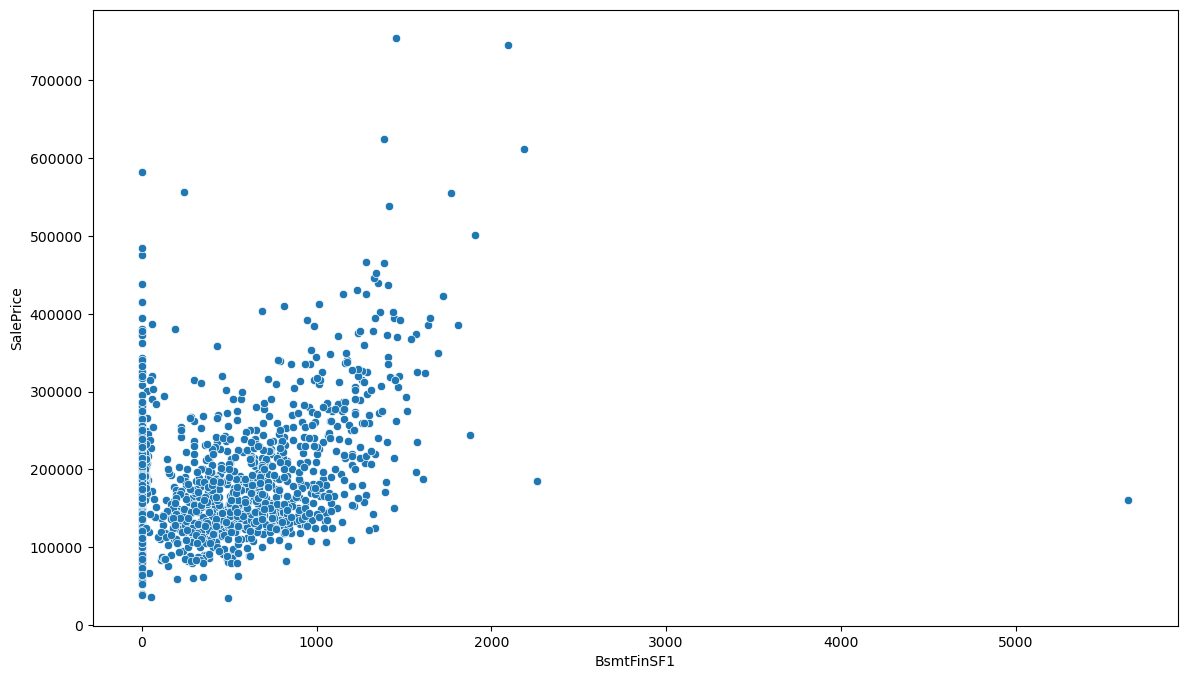

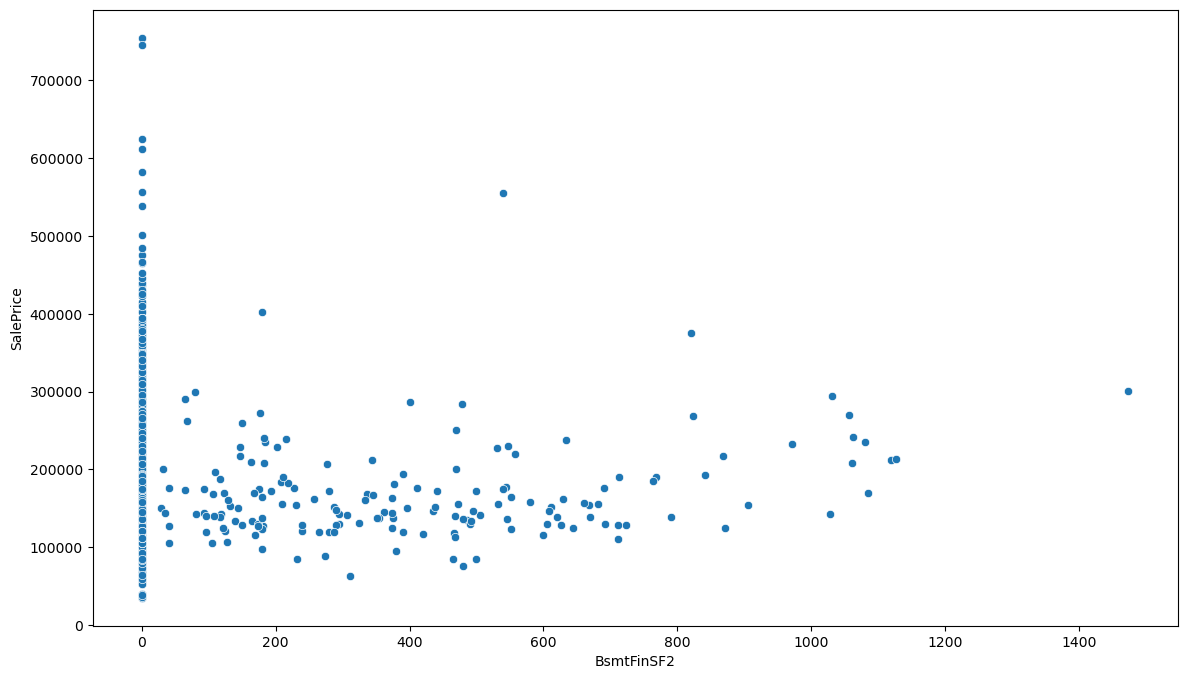

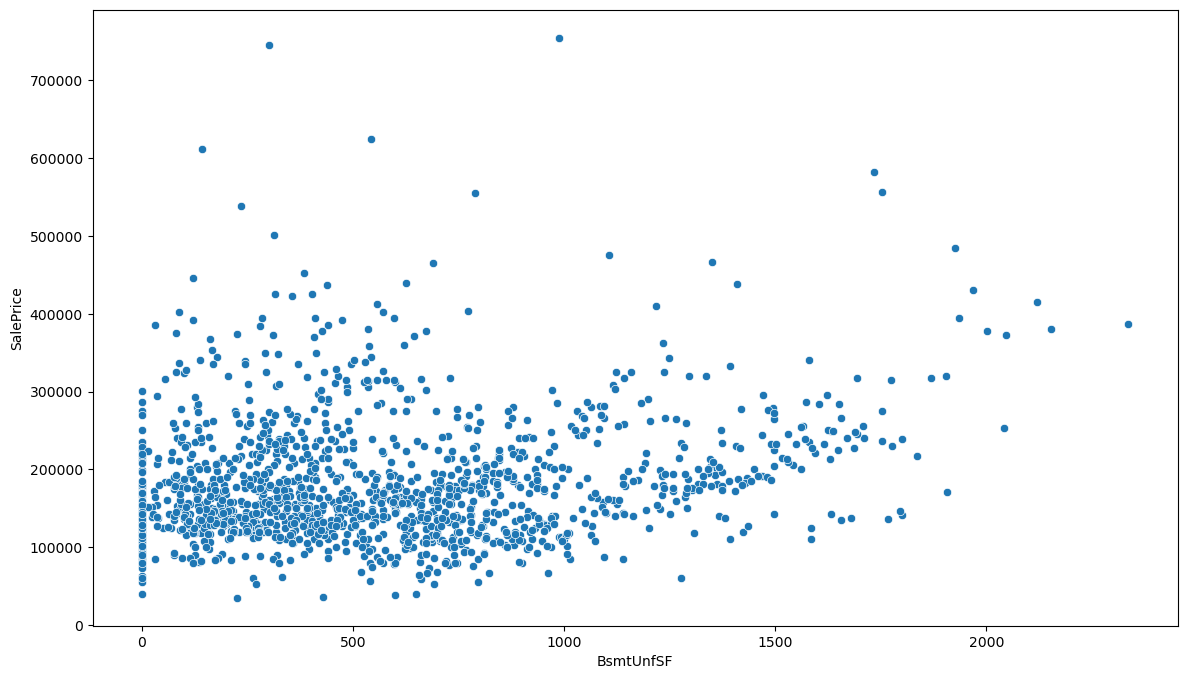

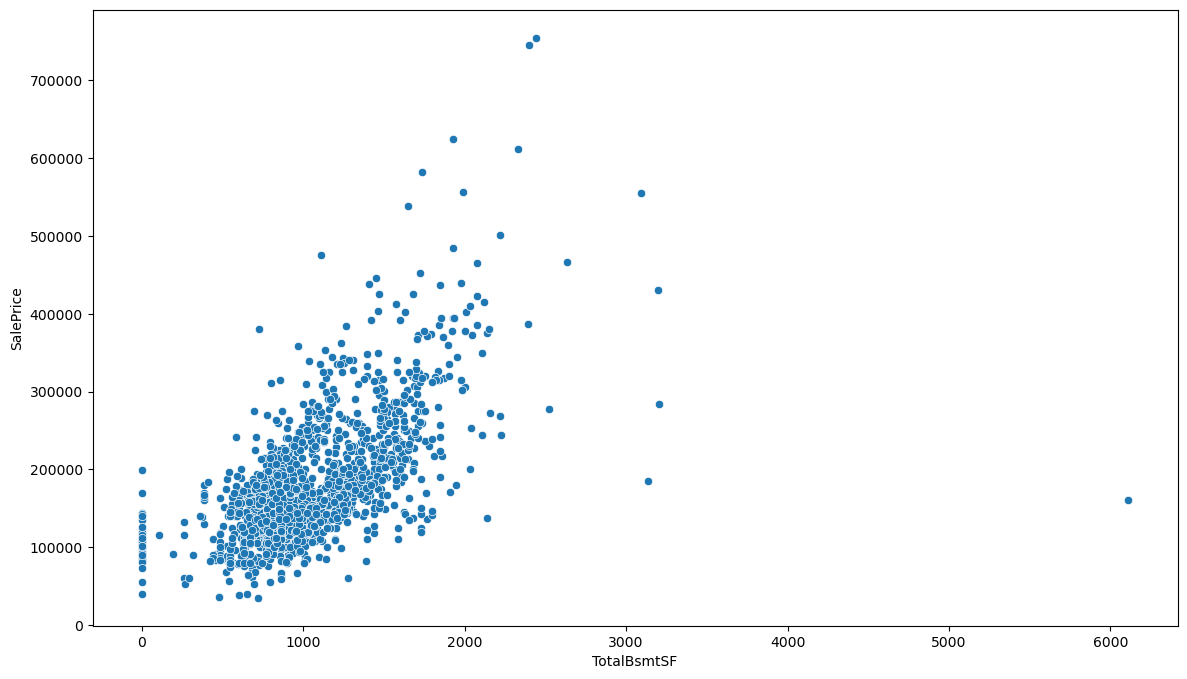

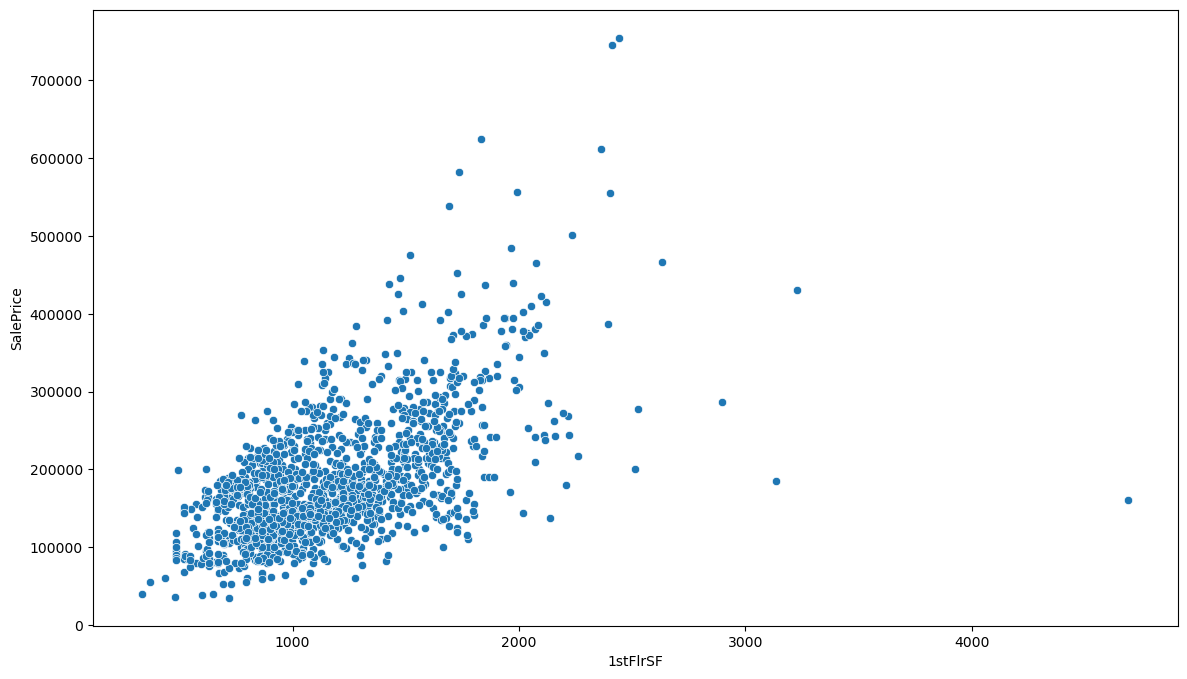

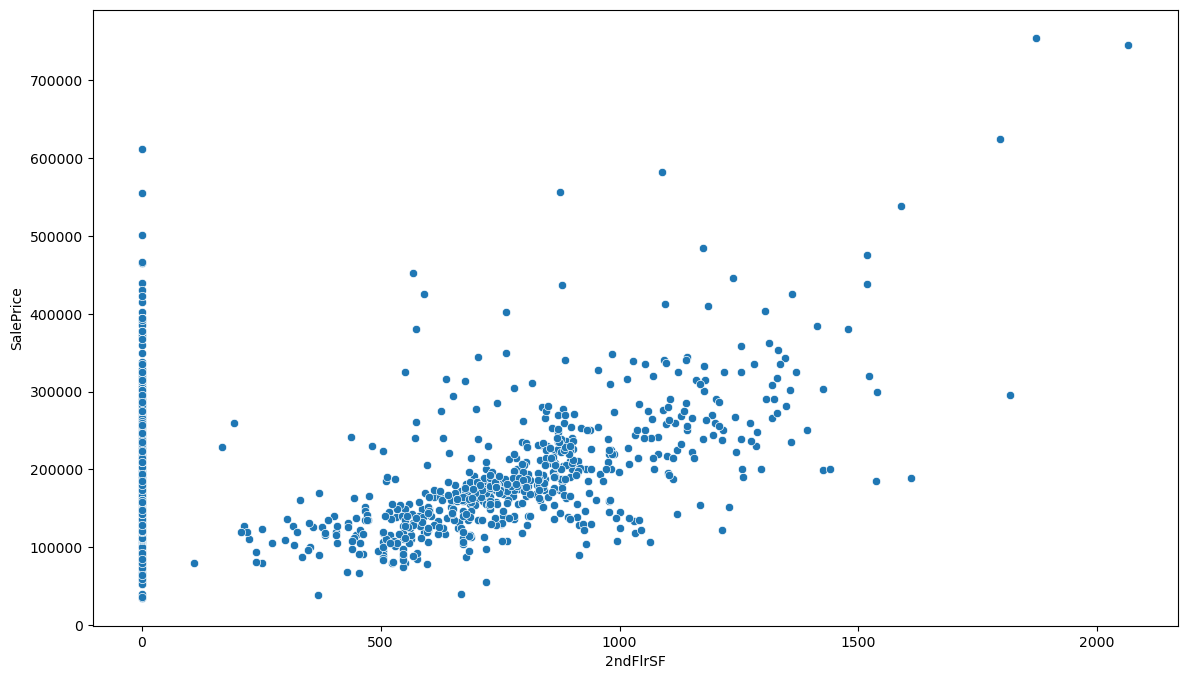

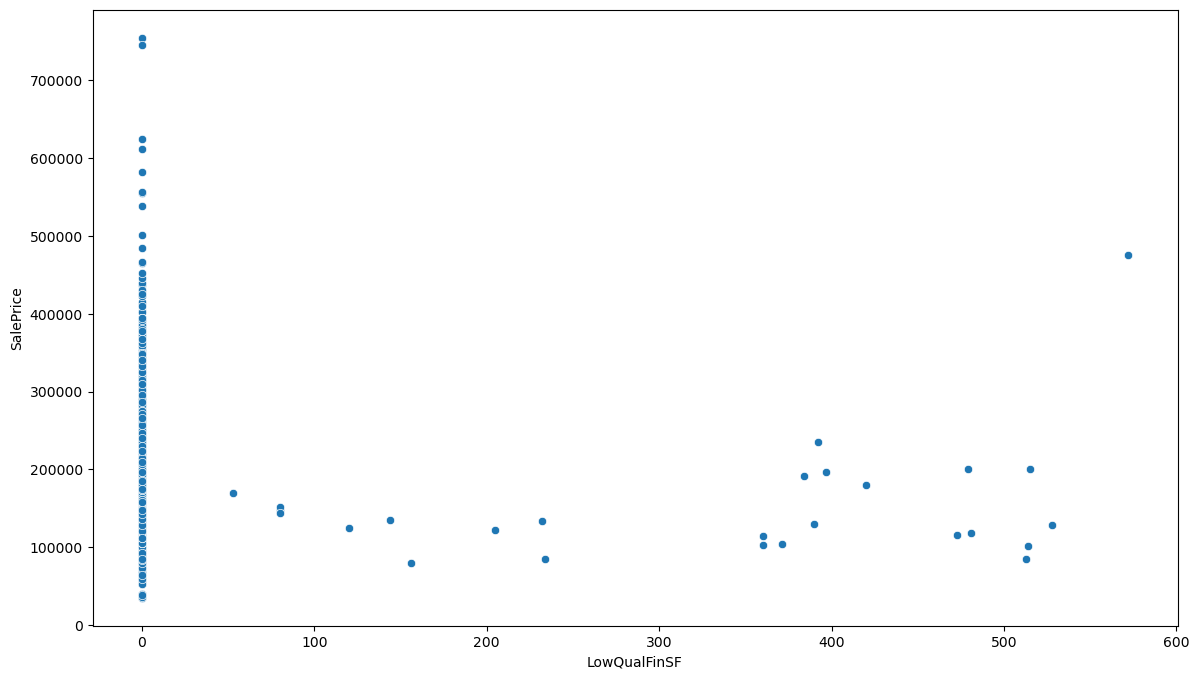

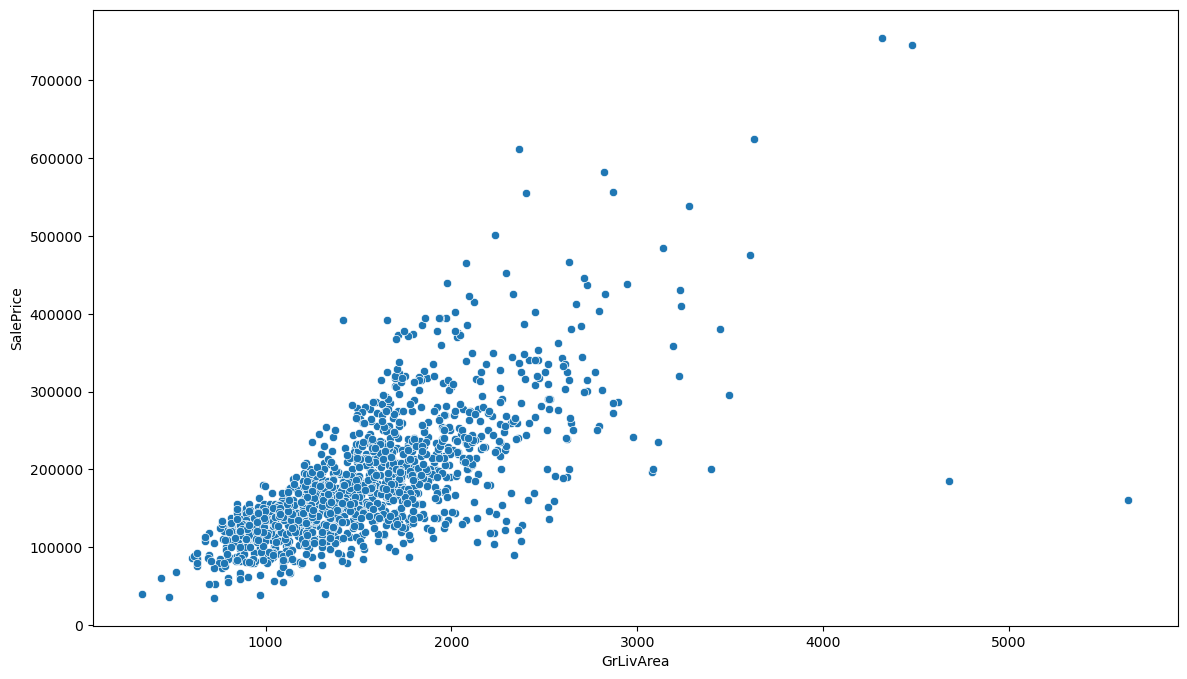

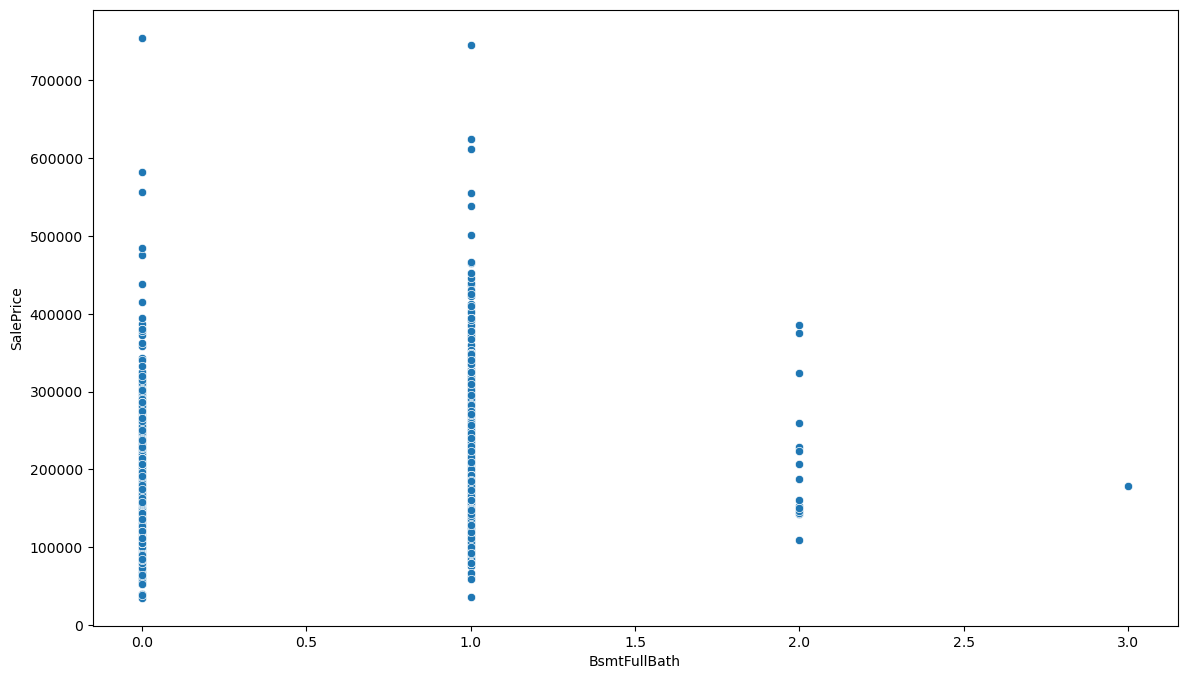

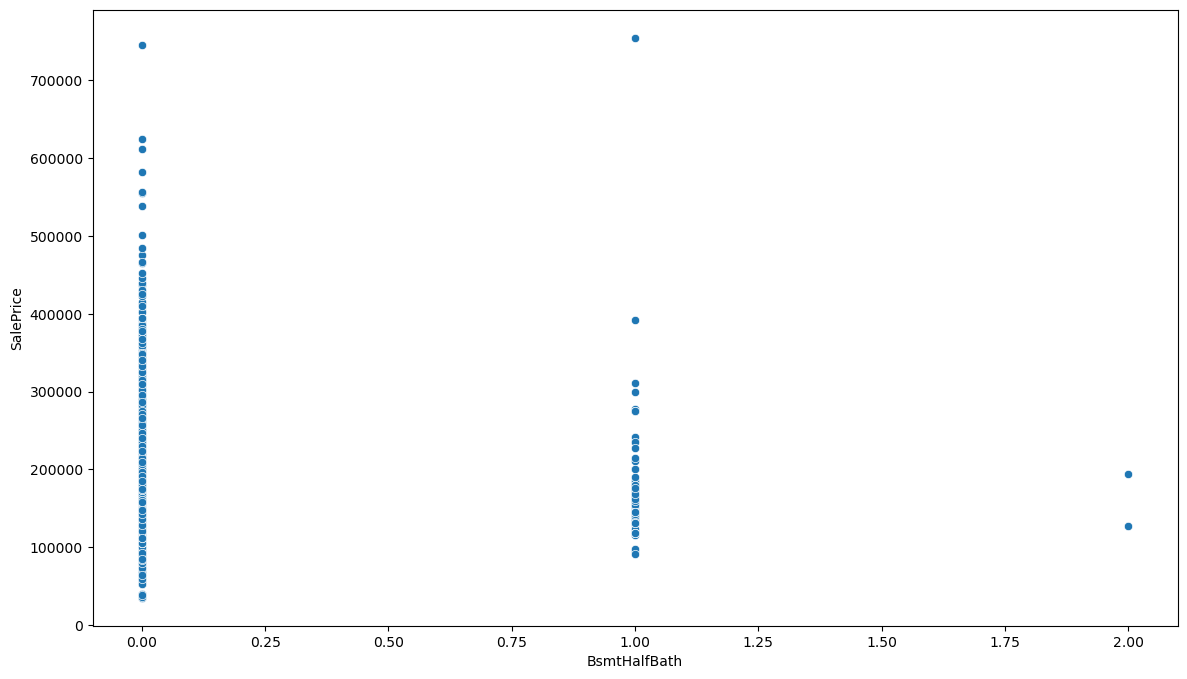

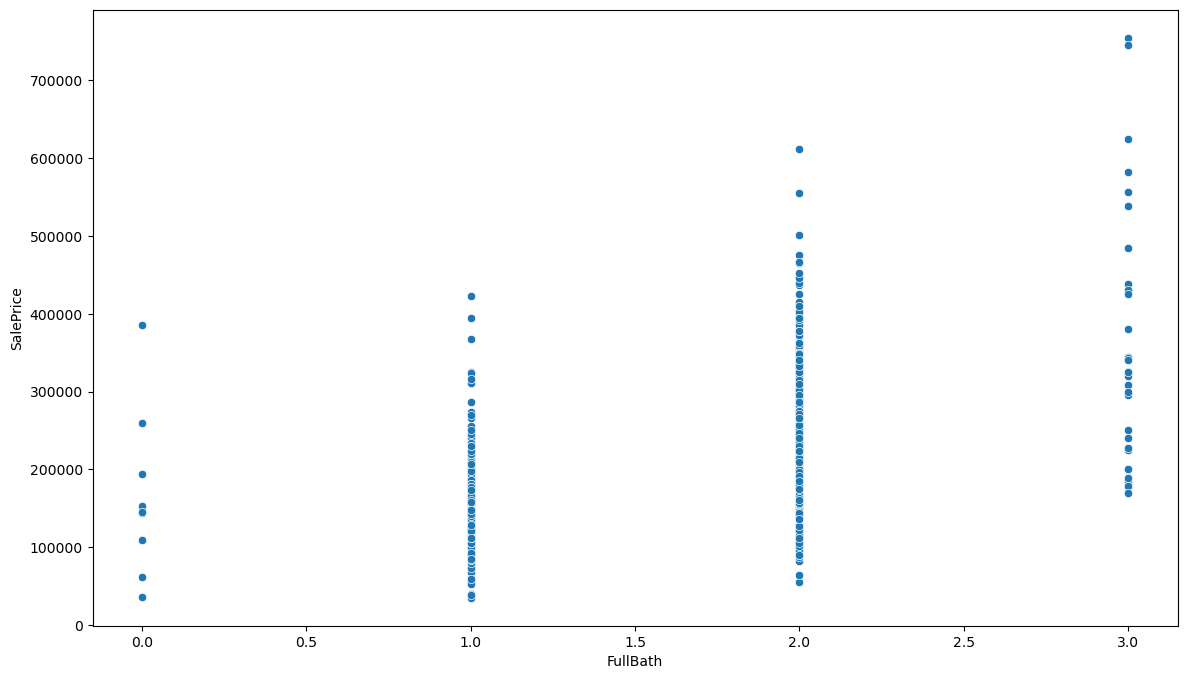

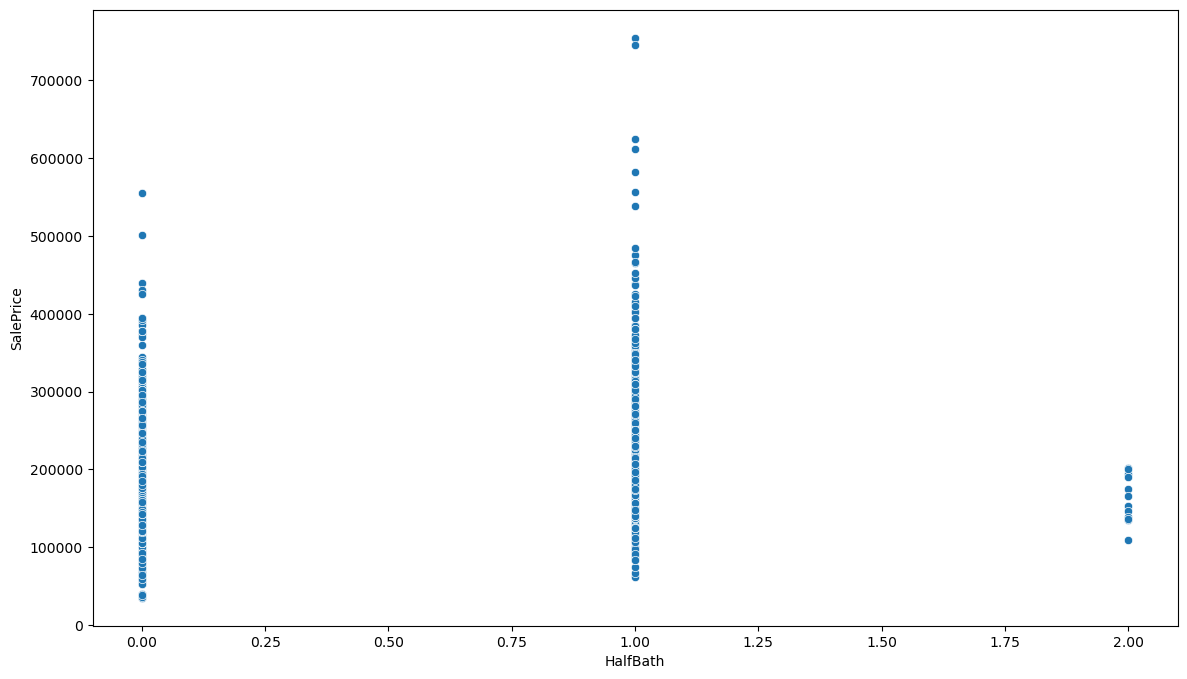

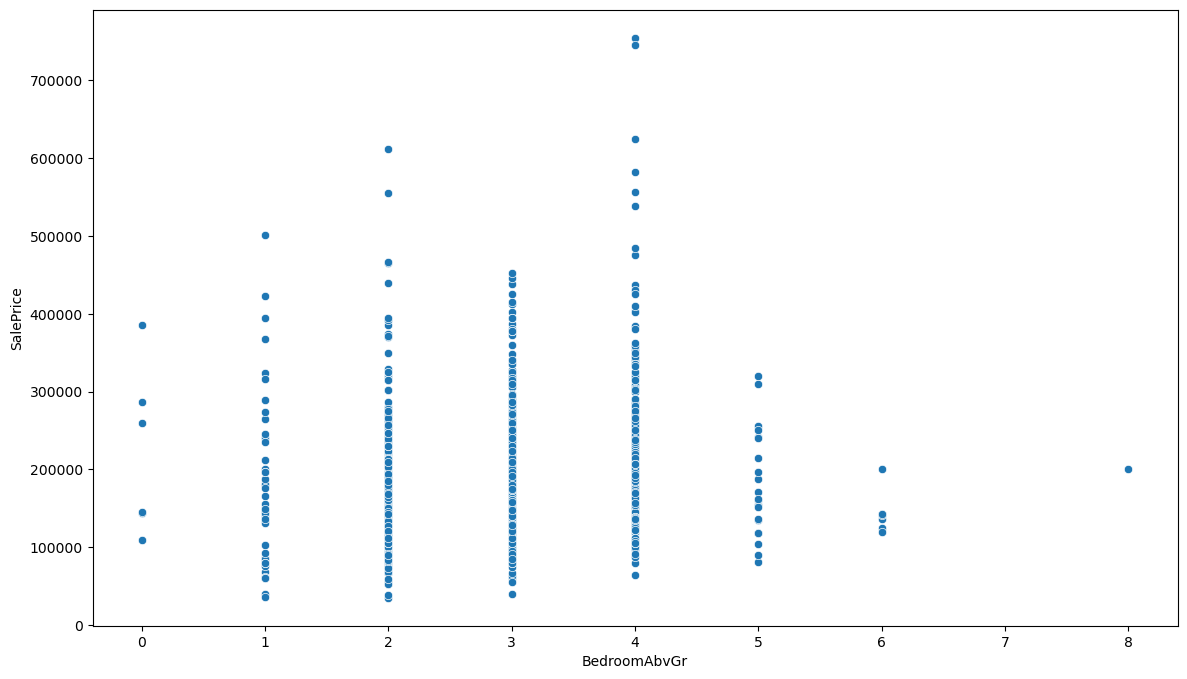

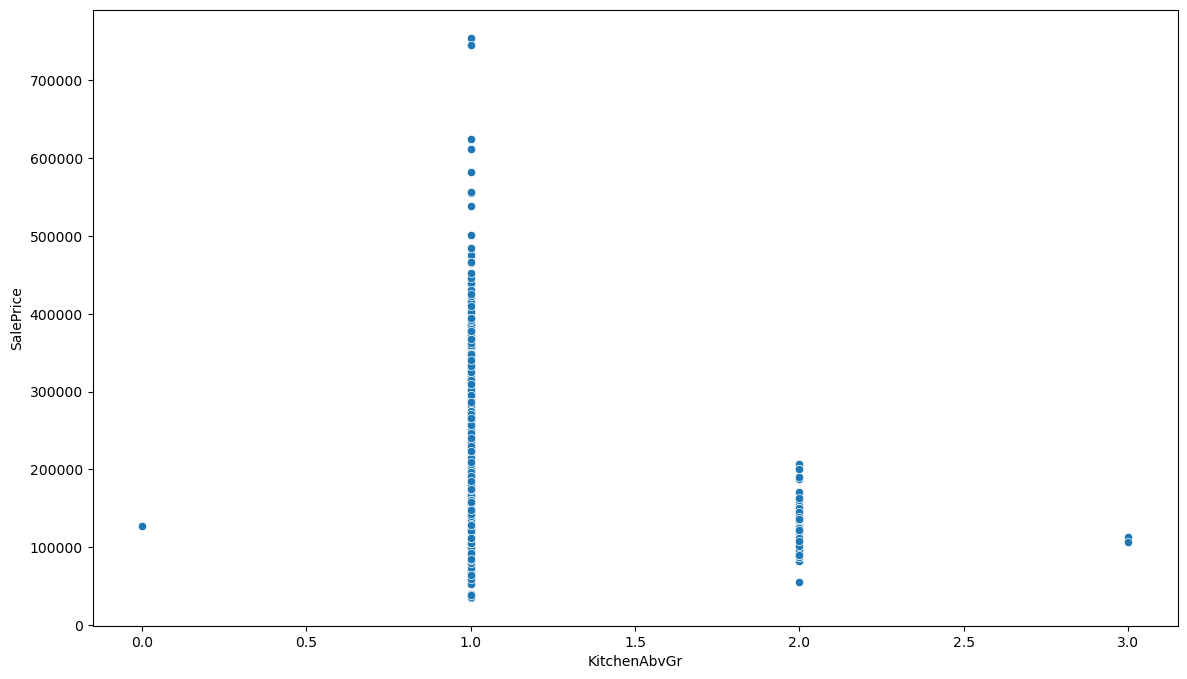

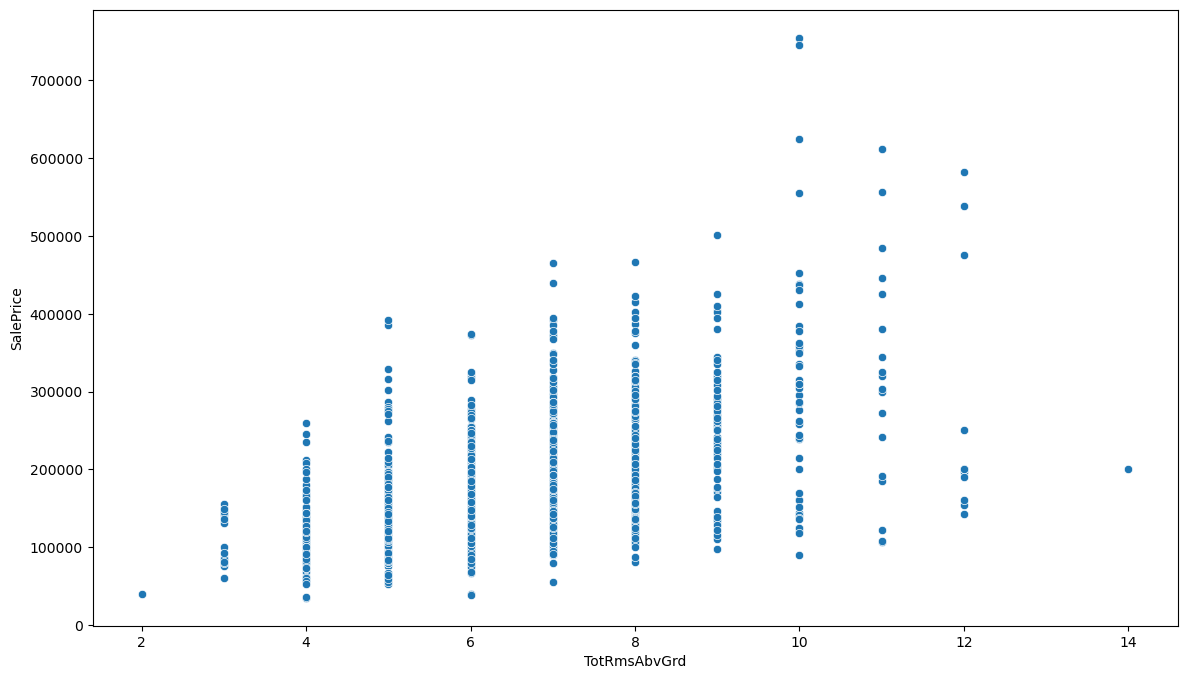

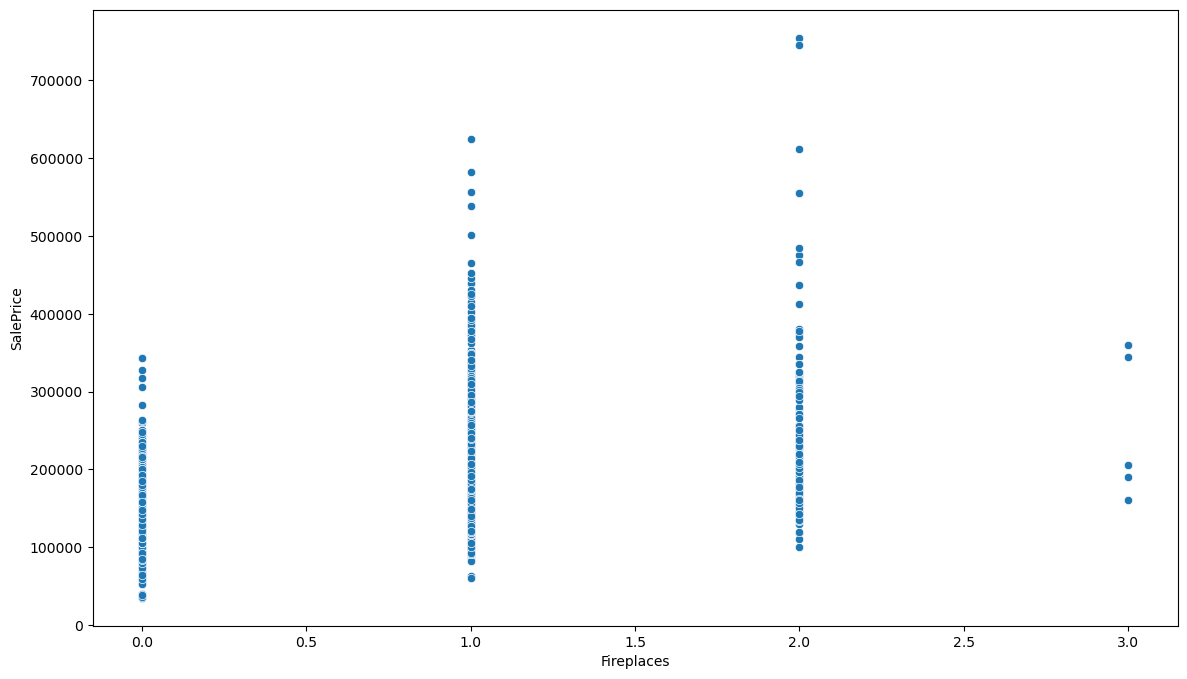

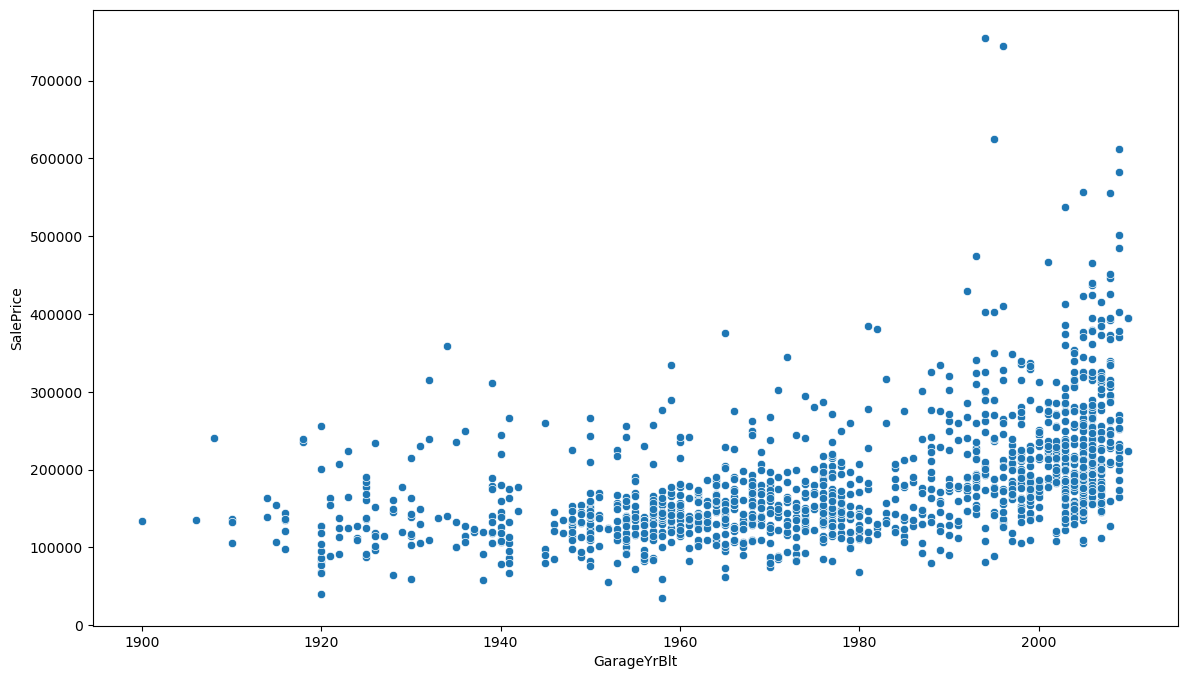

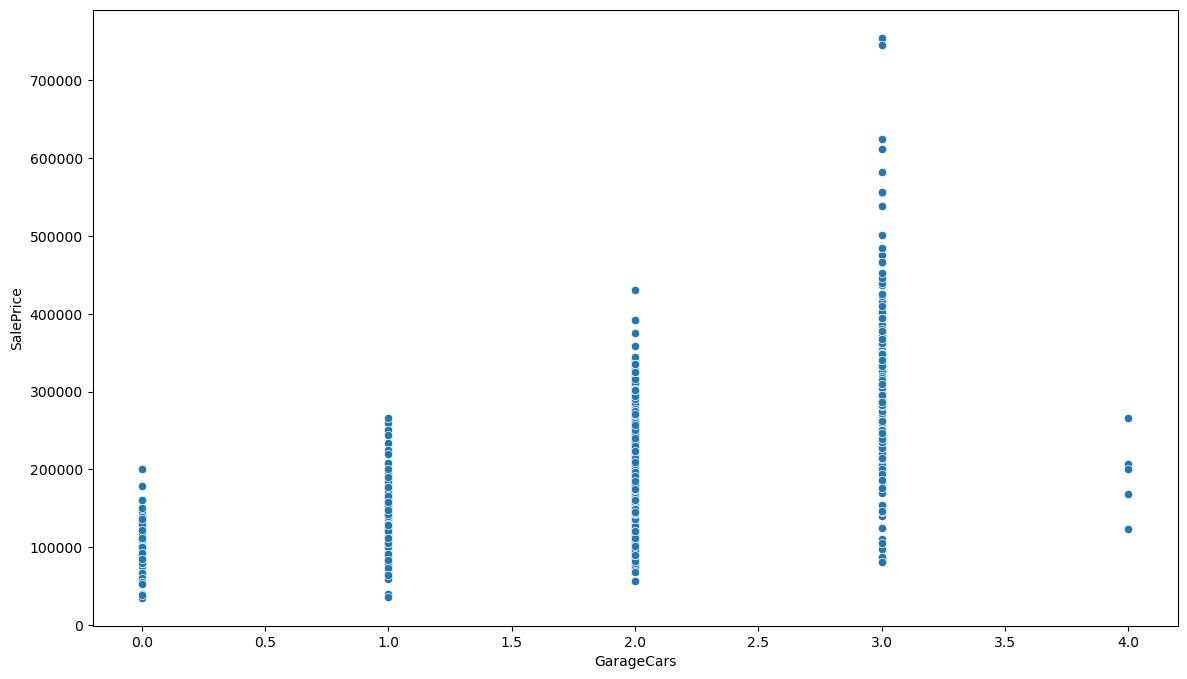

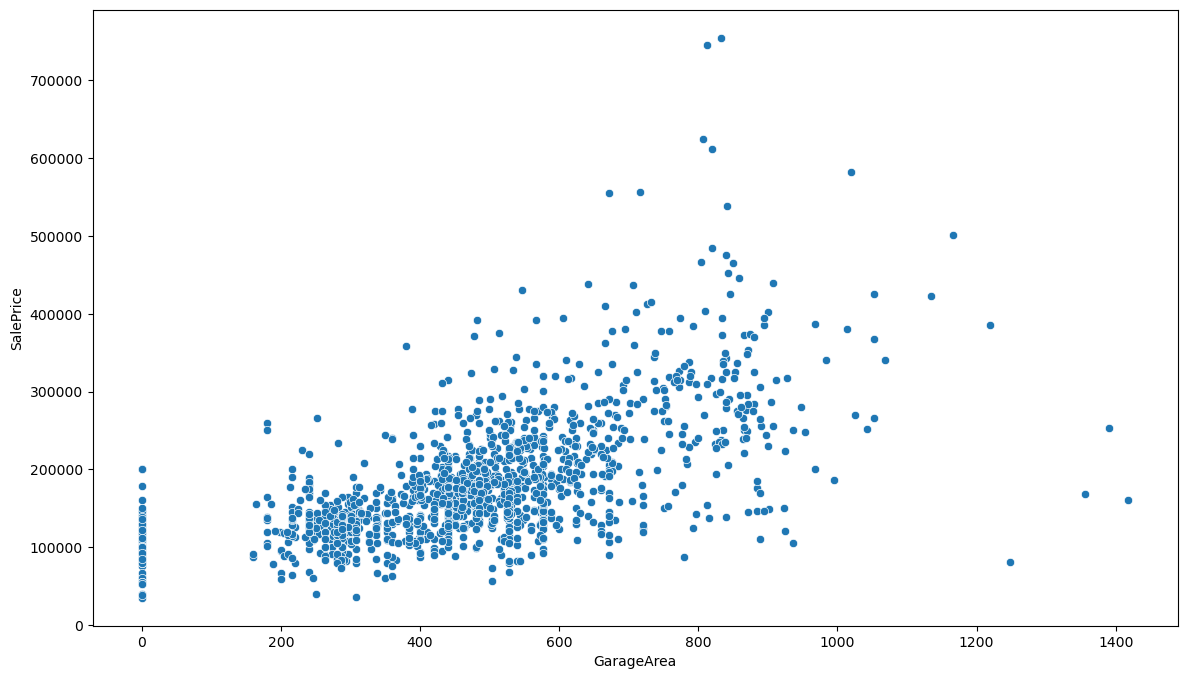

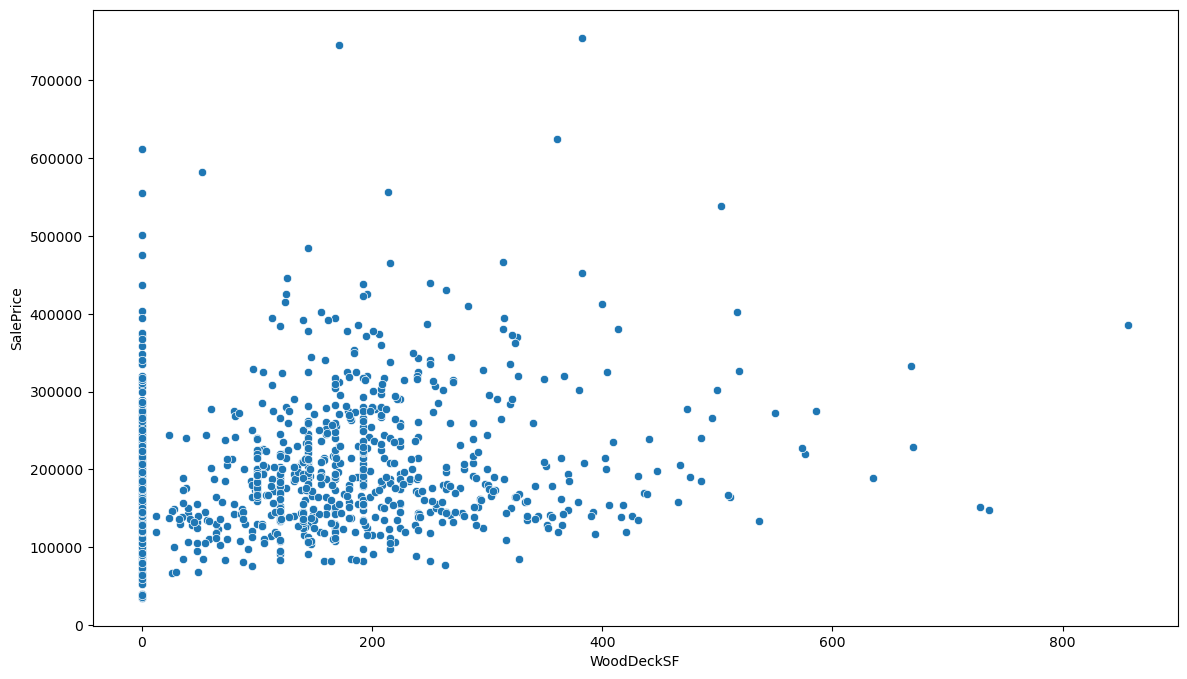

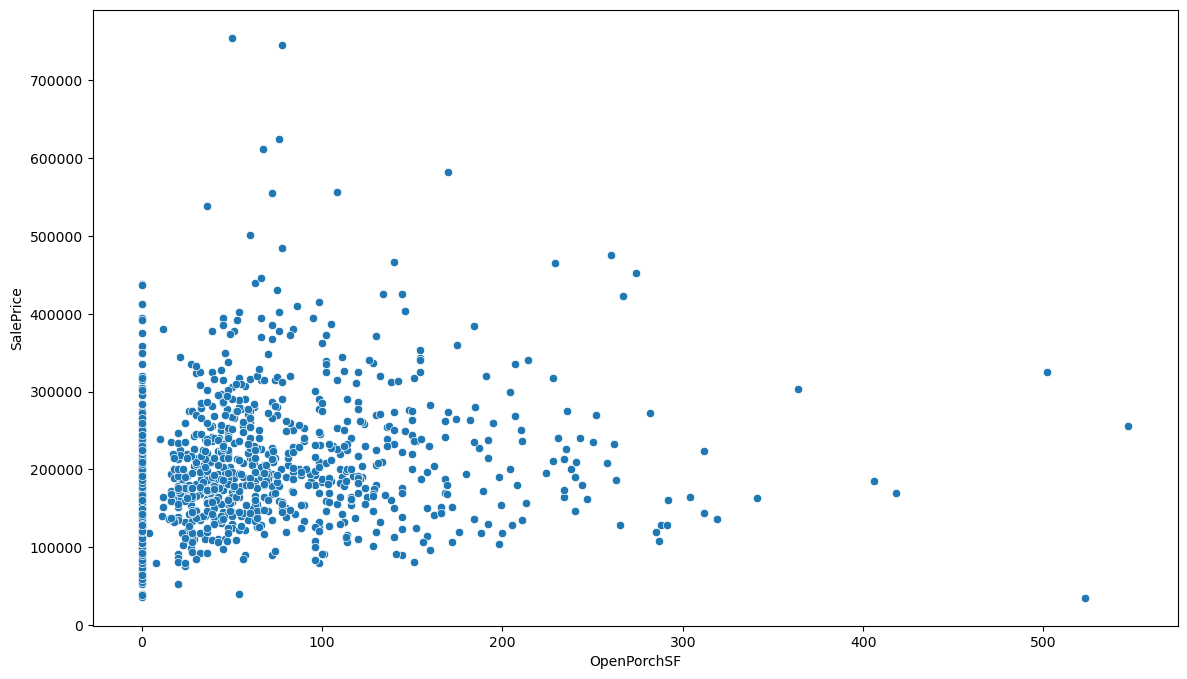

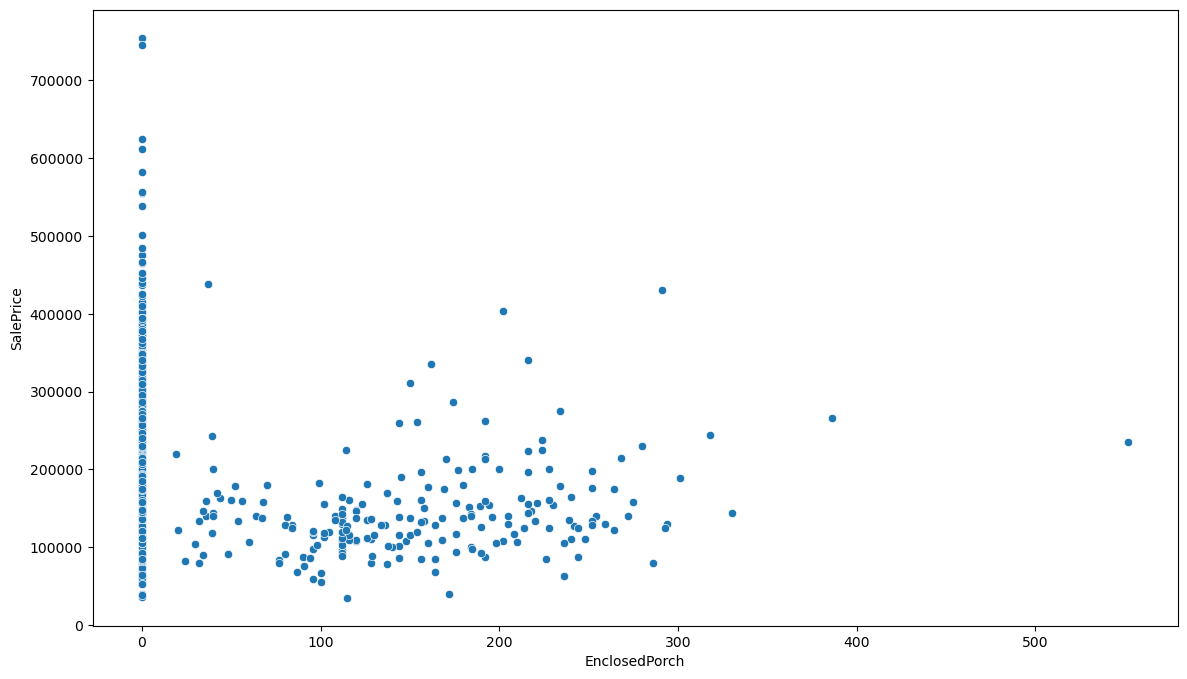

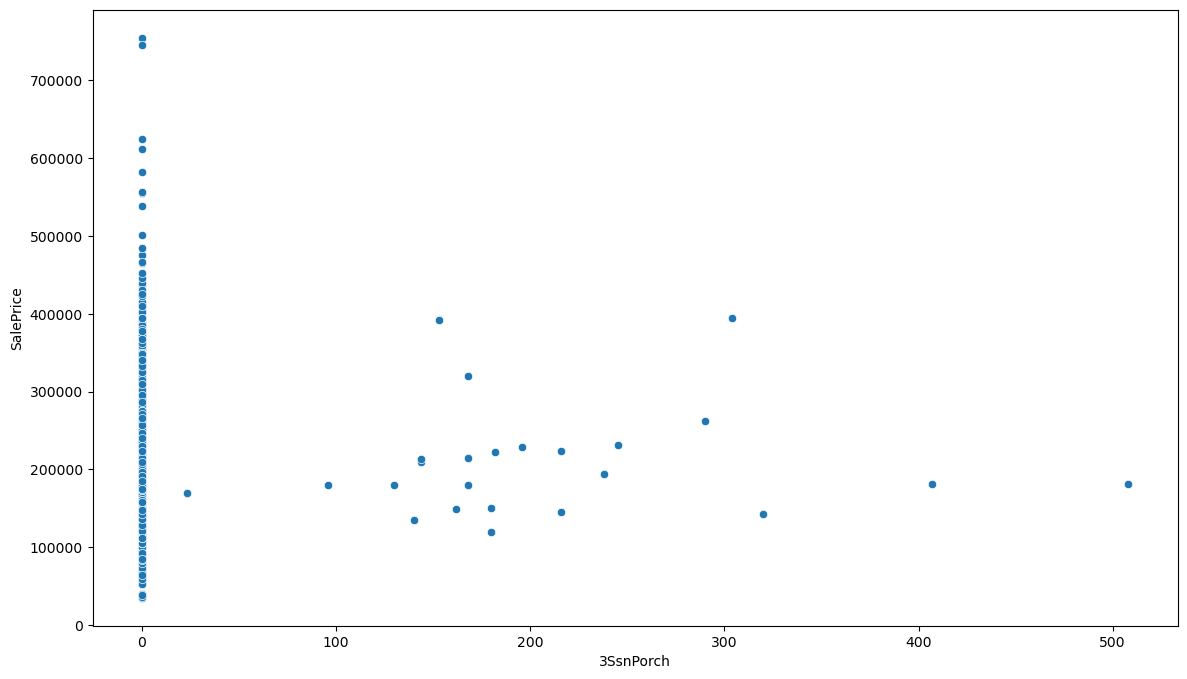

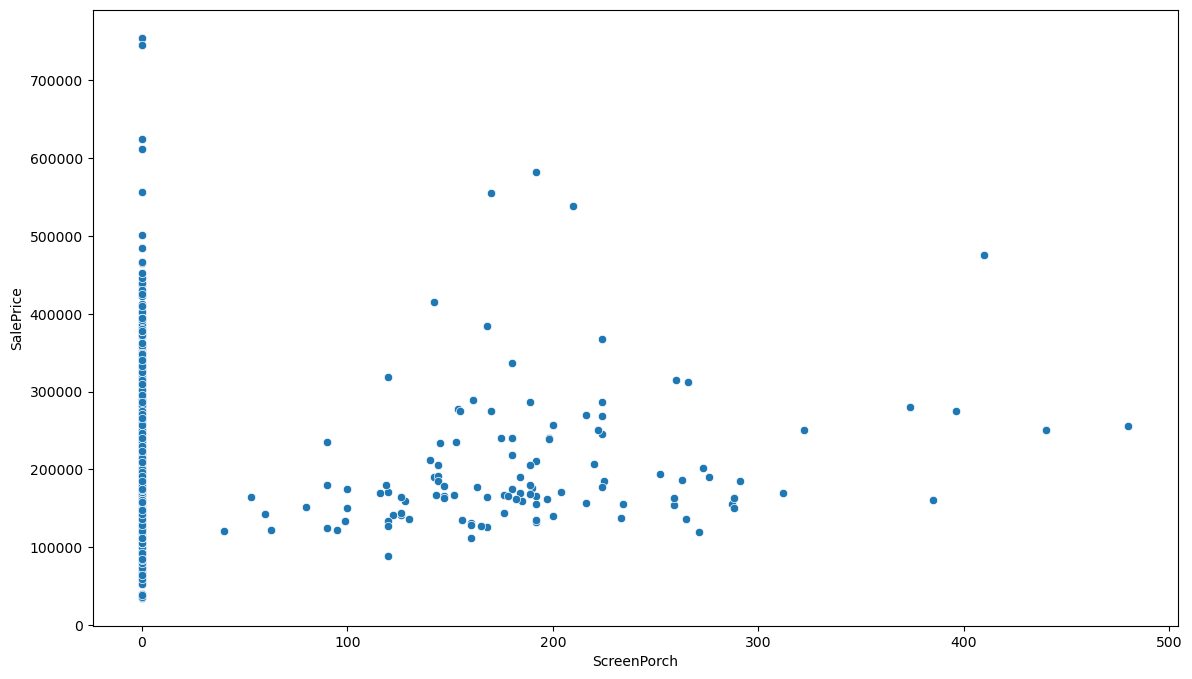

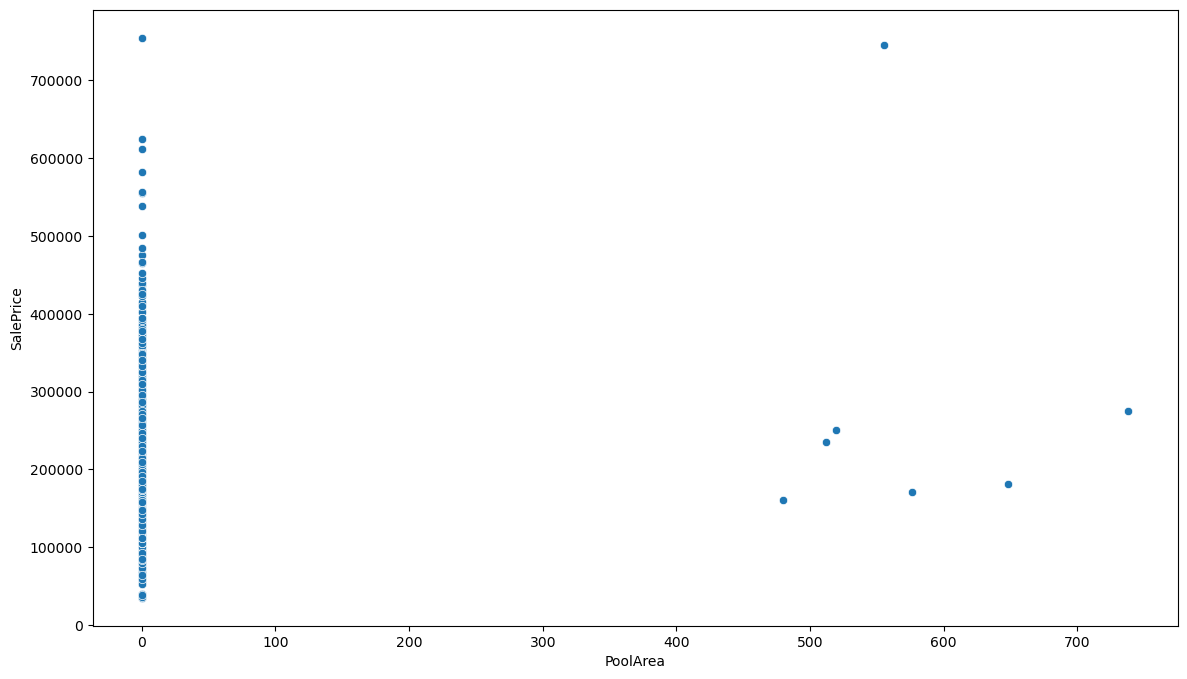

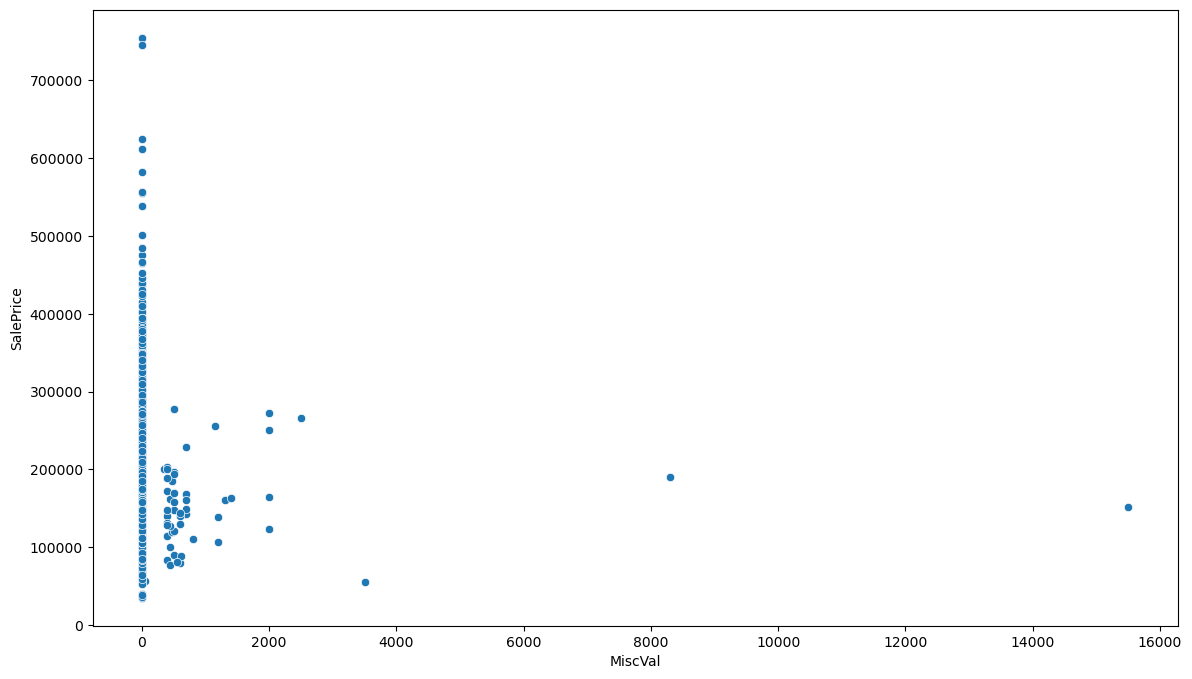

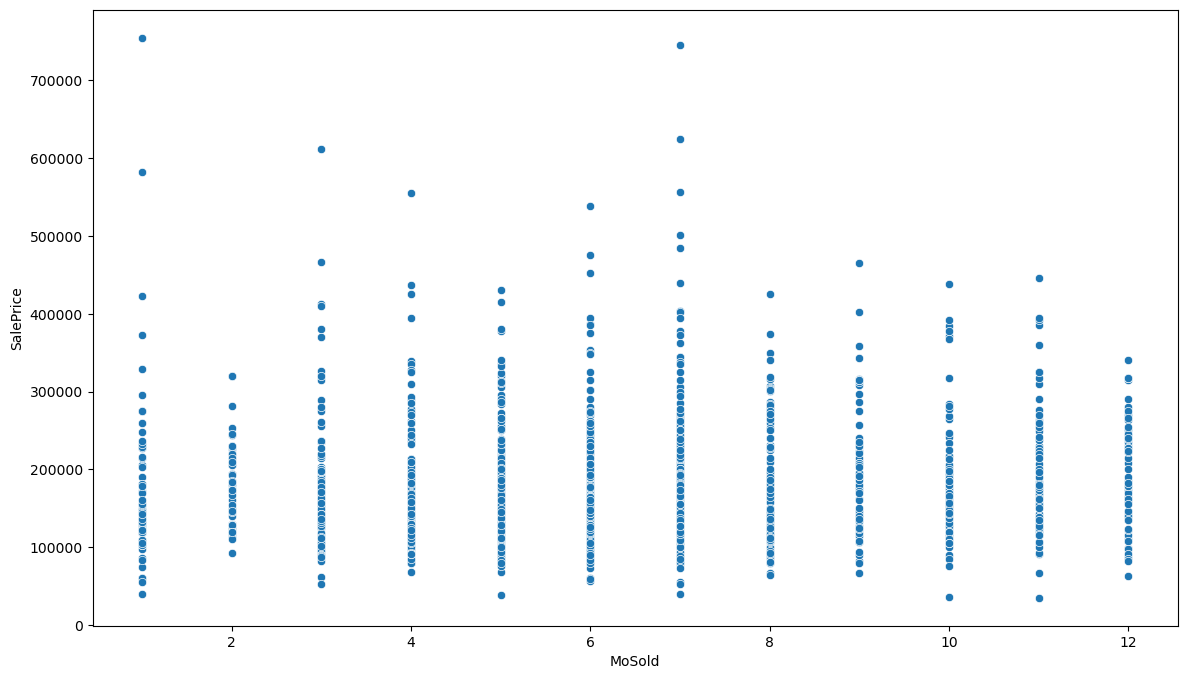

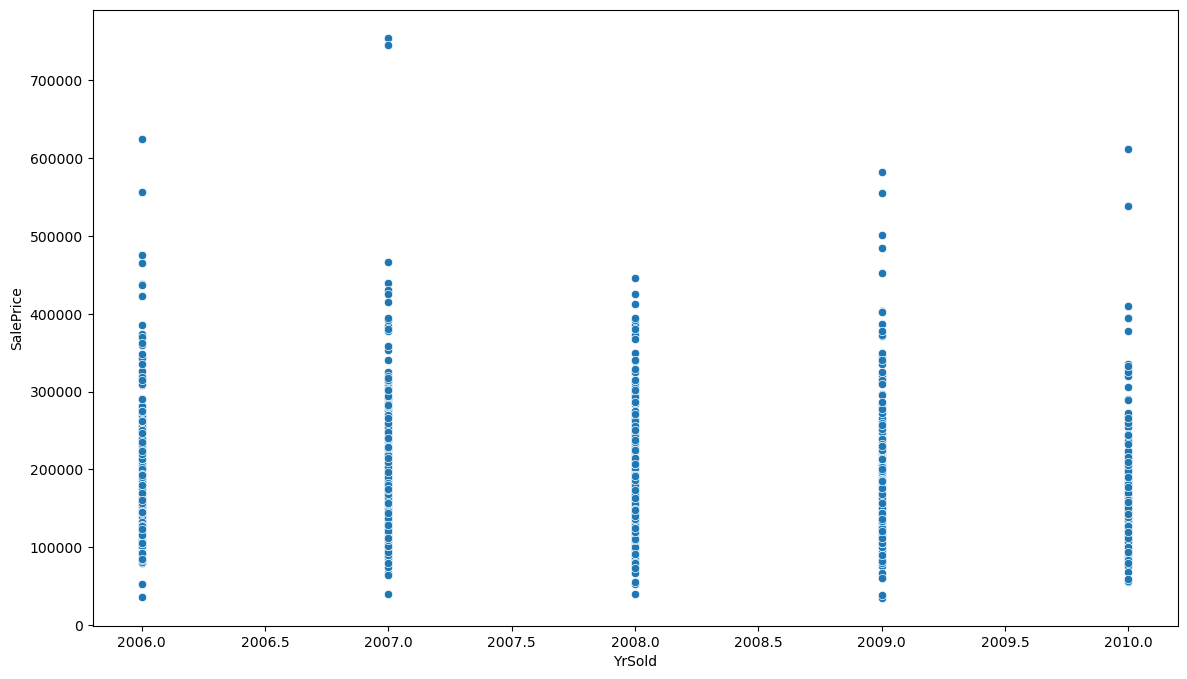

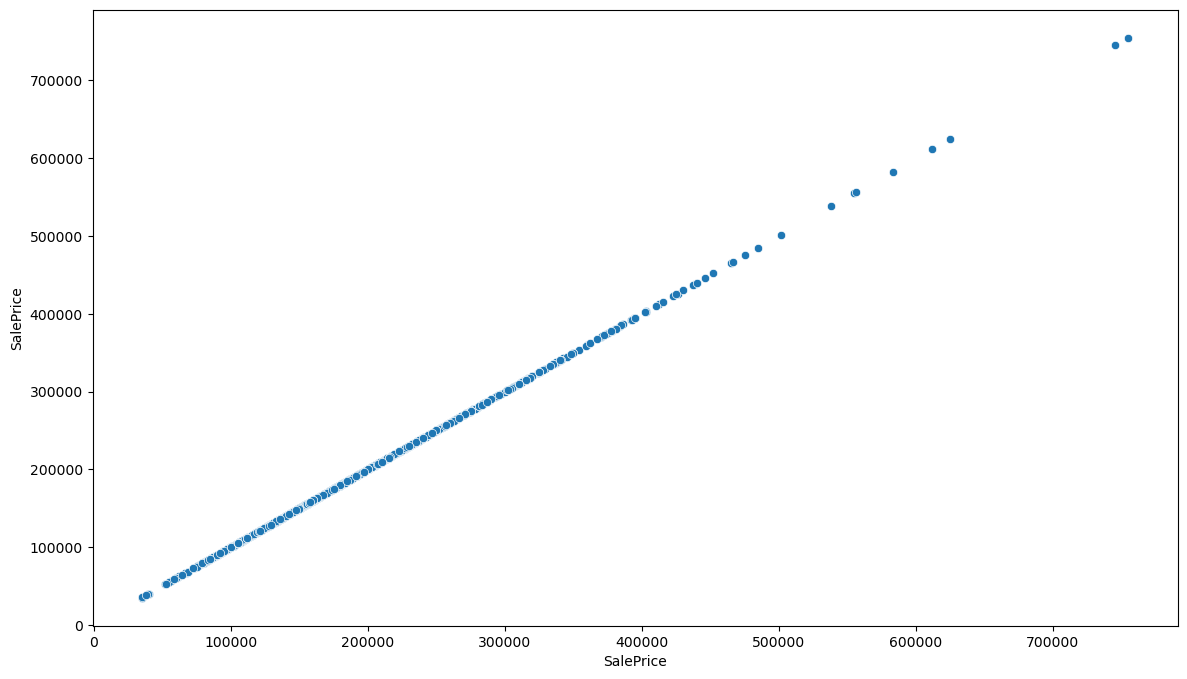

In [5]:
for i in traindf.columns:
    if traindf[i].dtypes in ["int64","float64"]:
        plt.figure(figsize=(14,8))
        sns.scatterplot(data=traindf,x=traindf[i],y=traindf["SalePrice"])
        

In [6]:
traindf['SalePrice'] = pd.qcut(traindf['SalePrice'], 3, labels=["Low", "Mid", "High"])

In [7]:
size_mapping = {
    'Low': 1,    
    'Mid': 2, 
    'High': 3    
}
traindf['SalePrice'] = traindf['SalePrice'].map(size_mapping)


In [8]:
combined = pd.concat([traindf, testdf], sort=False)

In [9]:
combined

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,3
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,3
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [10]:
def numCols(df):
    return df.select_dtypes(include=['int64', 'float64']).columns

In [11]:
numeric_cols_df = numCols(combined)

In [12]:
scaler = StandardScaler()
combined[numeric_cols_df] = scaler.fit_transform(combined[numeric_cols_df])

In [13]:
combined

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.731458,0.067331,RL,-0.184481,-0.217879,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,-1.552184,0.157646,WD,Normal,3
1,-1.730271,-0.873616,RL,0.458190,-0.072044,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,-0.446925,-0.602962,WD,Normal,2
2,-1.729084,0.067331,RL,-0.055946,0.137197,Pave,NaN,IR1,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,1.026753,0.157646,WD,Normal,3
3,-1.727897,0.302568,RL,-0.398704,-0.078385,Pave,NaN,IR1,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,-1.552184,-1.363569,WD,Abnorml,2
4,-1.726711,0.067331,RL,0.629569,0.518903,Pave,NaN,IR1,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,2.132012,0.157646,WD,Normal,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.726711,2.419700,RM,-2.069648,-1.043937,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,-0.078505,-1.363569,WD,Normal,NaN
1455,1.727897,2.419700,RM,-2.069648,-1.049263,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,-0.815344,-1.363569,WD,Abnorml,NaN
1456,1.729084,-0.873616,RL,3.885767,1.246808,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,1.026753,-1.363569,WD,Abnorml,NaN
1457,1.730271,0.655424,RL,-0.313015,0.034605,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,MnPrv,Shed,1.144312,0.289914,-1.363569,WD,Normal,NaN


# Variables ordinales (X_train)

In [14]:
quality_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
exposure_mapping = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1}
finish_mapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1}
garage_finish_mapping = {'Fin': 3, 'RFn': 2, 'Unf': 1}
paved_drive_mapping = {'Y': 3, 'P': 2, 'N': 1}
fire_place_mapping = {"Ex":6,"Gd":5,"TA":4,"Fa":3,"Po":2,"NA":1}
ordinal_features = {
    'ExterQual': quality_mapping, 'ExterCond': quality_mapping,
    'BsmtQual': quality_mapping, 'BsmtCond': quality_mapping,
    'BsmtExposure': exposure_mapping,
    'BsmtFinType1': finish_mapping, 'BsmtFinType2': finish_mapping,
    'HeatingQC': quality_mapping,
    'KitchenQual': quality_mapping,
    'GarageFinish': garage_finish_mapping,
    'GarageQual': quality_mapping, 'GarageCond': quality_mapping,
    'PavedDrive': paved_drive_mapping,
    'FireplaceQu' : fire_place_mapping #nuevo
}

for feature, mapping in ordinal_features.items():
    combined[feature] = combined[feature].map(mapping)
    

In [15]:
combined[['ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'GarageFinish']].head()

,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,GarageFinish
0,4,4.0,1.0,6.0,2.0
1,3,4.0,4.0,5.0,2.0
2,4,4.0,2.0,6.0,2.0
3,3,3.0,1.0,5.0,1.0
4,4,4.0,3.0,6.0,2.0


# Variables nominales (X_train)

In [16]:
nominal_vars = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'SaleType',
                'SaleCondition']

combined_encoded = pd.get_dummies(combined, columns=nominal_vars, drop_first=True)

In [17]:
combined_encoded.shape

(2919, 207)

In [18]:
for i in combined_encoded.columns:
    if combined_encoded[i].dtypes == "object":
        print(i)

Alley
PoolQC
Fence
MiscFeature


In [19]:
for i in traindf.columns:
    if traindf[i].dtype == "object":
        plt.figure(figsize=(14,8))
        sns.boxplot(x=traindf[i],y=traindf["SalePrice"])

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1400x800 with 0 Axes>

#acabo de quitar la calidad de chimenea

In [20]:
combined_encoded.drop(["Alley","PoolQC","Fence","MiscFeature","OverallCond","Id","MiscVal","YrSold","3SsnPorch","LowQualFinSF"],axis=1,inplace=True)

In [21]:
combined_encoded.dropna(inplace=True)

In [22]:
y = combined_encoded["SalePrice"]

In [23]:
X = combined_encoded.drop(columns=["SalePrice"])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
y

1       2
2       3
3       2
4       3
6       3
       ..
1447    3
1451    3
1455    2
1456    3
1457    3
Name: SalePrice, Length: 583, dtype: category
Categories (3, int64): [1 < 2 < 3]

# Kernel lineal

In [26]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [27]:
y_pred = svm_model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [29]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8034188034188035
Confusion Matrix:
[[12  5  0]
 [ 6 27  6]
 [ 0  6 55]]
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.71      0.69        17
           2       0.71      0.69      0.70        39
           3       0.90      0.90      0.90        61

    accuracy                           0.80       117
   macro avg       0.76      0.77      0.76       117
weighted avg       0.80      0.80      0.80       117



In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [31]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

In [32]:
svm_model = SVC(random_state=42)

In [33]:
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [34]:
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

Mejores hiperparámetros encontrados: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [35]:
best_svm_model = SVC(**best_params, random_state=42)
#** desempaqueta un diccionario

#SVC(C=0.1, gamma=0.1, kernel='linear', random_state=42)
best_svm_model.fit(X_train, y_train)

SVC(C=10, gamma=0.01, random_state=42)

In [36]:
y_pred = best_svm_model.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [38]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8547008547008547
Confusion Matrix:
[[14  3  0]
 [ 2 31  6]
 [ 0  6 55]]
Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.78      0.79      0.78        39
           3       0.90      0.90      0.90        61

    accuracy                           0.85       117
   macro avg       0.85      0.84      0.84       117
weighted avg       0.86      0.85      0.85       117



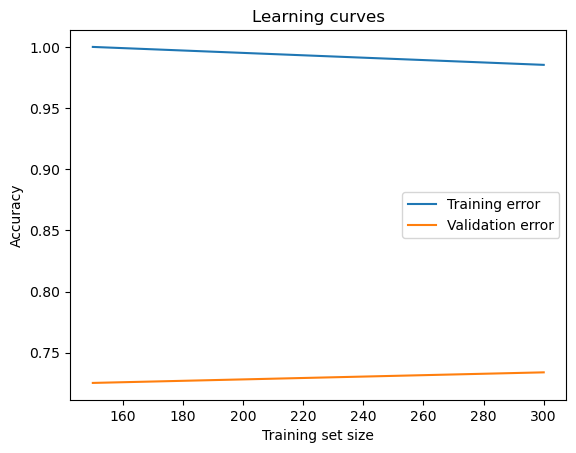

In [40]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = SVC(kernel='linear',random_state=42),
    X = X_train,
    y = y_train,
    train_sizes = [1, 150, 300],
    cv = 5,
    scoring = 'accuracy'
)

train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend()


In [41]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

NameError: name 'mean_squared_error' is not defined

# Kernel RBF

In [42]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [43]:
y_pred = svm_model.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [45]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7863247863247863
Confusion Matrix:
[[ 9  8  0]
 [ 2 27 10]
 [ 0  5 56]]
Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.53      0.64        17
           2       0.68      0.69      0.68        39
           3       0.85      0.92      0.88        61

    accuracy                           0.79       117
   macro avg       0.78      0.71      0.74       117
weighted avg       0.79      0.79      0.78       117



In [46]:
param_grid ={
      'C': [0.5, 1, 5], 
    'gamma': [0.05, 0.1, 0.15]  
}

In [47]:
svc = SVC(kernel='rbf')


In [48]:
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 1, 5], 'gamma': [0.05, 0.1, 0.15]},
             scoring='accuracy', verbose=1)

In [49]:
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

Mejores hiperparámetros encontrados: {'C': 5, 'gamma': 0.05}


In [50]:
best_svm_model = SVC(**best_params)

In [51]:
best_svm_model.fit(X_train, y_train)

SVC(C=5, gamma=0.05)

In [52]:
y_pred = best_svm_model.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [54]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7948717948717948
Confusion Matrix:
[[11  5  1]
 [ 2 25 12]
 [ 0  4 57]]
Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.65      0.73        17
           2       0.74      0.64      0.68        39
           3       0.81      0.93      0.87        61

    accuracy                           0.79       117
   macro avg       0.80      0.74      0.76       117
weighted avg       0.79      0.79      0.79       117



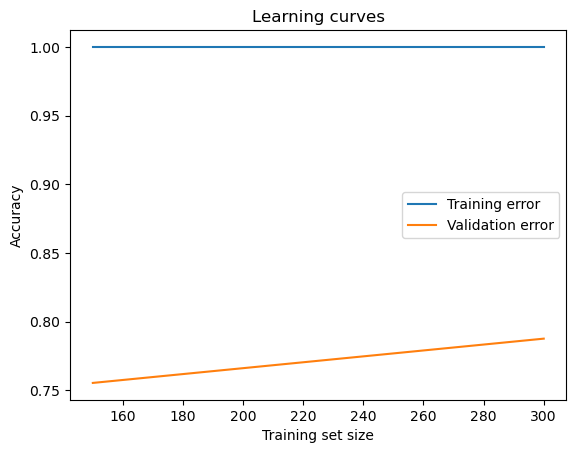

In [56]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = SVC(kernel='rbf', C=5, gamma=0.05),
    X = X_train,
    y = y_train,
    train_sizes = [1, 150, 300],
    cv = 5,
    scoring = 'accuracy'
)

train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend()


# Kernel Sigmoide

In [57]:
svm_sigmoid = SVC(kernel='sigmoid', gamma=0.01, C=1.0, coef0=0)
svm_sigmoid.fit(X_train, y_train)

y_pred_sigmoid = svm_sigmoid.predict(X_test)
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.35      0.23      0.28        39
           3       0.64      0.95      0.76        61

    accuracy                           0.57       117
   macro avg       0.33      0.39      0.35       117
weighted avg       0.45      0.57      0.49       117



C:\Users\esco1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\esco1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\esco1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [59]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7948717948717948
Confusion Matrix:
[[11  5  1]
 [ 2 25 12]
 [ 0  4 57]]
Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.65      0.73        17
           2       0.74      0.64      0.68        39
           3       0.81      0.93      0.87        61

    accuracy                           0.79       117
   macro avg       0.80      0.74      0.76       117
weighted avg       0.79      0.79      0.79       117



In [60]:
param_grid = {
    'C': [90,95,100],  
    'gamma': [0.0005, 0.00055, 0.0006], 
    'coef0': [-0.015, -0.02,-0.025]  
}


In [61]:
svc = SVC(kernel='sigmoid')
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [90, 95, 100], 'coef0': [-0.015, -0.02, -0.025],
                         'gamma': [0.0005, 0.00055, 0.0006]},
             scoring='accuracy', verbose=1)

In [62]:
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

Mejores hiperparámetros encontrados: {'C': 95, 'coef0': -0.015, 'gamma': 0.0005}


In [63]:
best_svm_model = SVC(**best_params)

In [64]:
best_svm_model.fit(X_train, y_train)

SVC(C=95, coef0=-0.015, gamma=0.0005)

In [65]:
y_pred = best_svm_model.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [67]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8461538461538461
Confusion Matrix:
[[13  4  0]
 [ 3 30  6]
 [ 0  5 56]]
Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.76      0.79        17
           2       0.77      0.77      0.77        39
           3       0.90      0.92      0.91        61

    accuracy                           0.85       117
   macro avg       0.83      0.82      0.82       117
weighted avg       0.85      0.85      0.85       117



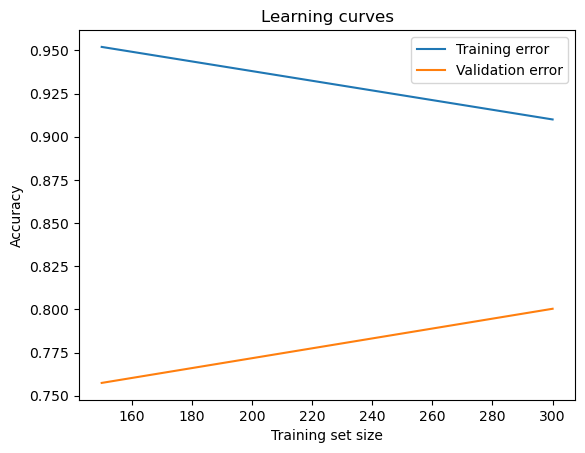

In [69]:
train_sizes, train_scores, validation_scores = learning_curve(
    estimator = SVC(kernel='sigmoid', C= 90, coef0=-0.015, gamma= 0.0006),
    X = X_train,
    y = y_train,
    train_sizes = [1, 150, 300],
    cv = 5,
    scoring = 'accuracy'
)

train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Accuracy')
plt.xlabel('Training set size')
plt.title('Learning curves')
plt.legend()
